Zewen Shan & "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

*[jump to final](#cell1)

# Mid-term

# 1. Business understanding: 
## The goal of this project is to predict movie success. Search Google using such key words as “predicting movie success” and understand the background of this prediction problem. Based on this research, write a summary of this business problem you’re trying to solve. Use bulleted lists and/or numbers in markdown cells. Answer the following questions as well:

### a.  What are the project’s goals?





the project's goals are predicting movie success. Using data mining and data analytics to find the elements of movie success. Finding the relationship and correlation between each element or variable. Getting the results, summary the main points for making the movie success and could answer the related issues.

### b. If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

I will collect three types of data:

1. basic movie information:


- movie name
- release date
- budget (production cost)
- movie type (genres)
- duration
- release countries
- languages
- visual (2D, 3D, IMAX)
- etc


2. actors and director


- all actors
- all director
- grades of actors 
- grades of directors
- likes and/or fans of actors and directors
- etc


3. publicity


- poster type
- grades of publicity (ways/ efficiency)
- budget (cost of publicity) 
- likes or previews of publicity video. 
- etc


### c. What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie’s success.



They are five types of variables are highly correlated to IMDb scores:

1. county


- country


2. movie year


- title_year


3. movie facebook popularity 


- cast_total_facebook_likes 
- movie_facebook_likes



4. movie_facebook_likes 


- director_facebook_likes、
- director_name


5.  top 3 actors/actresses facebook popularity


- actor_1_name
- actor_1_facebook_likes
- actor_2_name 
- actor_2_facebook_likes 
- actor_3_name 
- actor_3_facebook_likes

# 2. Data understanding: 
## The dataset contains a large number of variables with different types (e.g., numerical, categorial). Provide a brief summary of data understanding. Specifically, you need to:


In [1]:
# import packages
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
data=pd.read_csv("data/movie_metadata.csv")


### a. Describe data

In [3]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

- There are 5043 rows and 28 columns of data. 
- Three value types for those data, numeric (float 64 and int64) and categorical(object string). 
- Variable color has ‘Black and White’ or ‘Color’ 
- Genres have ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family'. 
- Title year from 1916 to 2016  
- The language variable has all the needed languages. 


### b. Identify data quality issues

In [6]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]

In [8]:
len(duplicateRowsDF)

45

There are two data quality issues. Null values and duplicate rows. handle it later.

### c.  Identify data types

In [9]:
data['color'] = data['color'].map({'Color': 0, ' Black and White': 1})

In [10]:
data.groupby('genres').size()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy              1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               2
Action|Adventure|Animation|Comedy|Family                            6
Action|Adventure|Animation|Comedy|Family|Fantasy                    4
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi             2
Action|Adventure|Animation|Comedy|Family|Sci-Fi                     3
Action|Adventure|Animation|Comedy|Fantasy                           1
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi                    1
Action|Adventure|Animation|Comedy|Sci-Fi                            1
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi                     1
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller            1
Action|Advent

In [11]:
data.groupby('content_rating').size()

content_rating
Approved       55
G             112
GP              6
M               5
NC-17           7
Not Rated     116
PG            701
PG-13        1461
Passed          9
R            2118
TV-14          30
TV-G           10
TV-MA          20
TV-PG          13
TV-Y            1
TV-Y7           1
Unrated        62
X              13
dtype: int64

In [12]:
data.groupby('country').size()

country
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
Bahamas                    1
Belgium                    4
Brazil                     8
Bulgaria                   1
Cambodia                   1
Cameroon                   1
Canada                   126
Chile                      1
China                     30
Colombia                   1
Czech Republic             3
Denmark                   11
Dominican Republic         1
Egypt                      1
Finland                    1
France                   154
Georgia                    1
Germany                   97
Greece                     2
Hong Kong                 17
Hungary                    2
Iceland                    3
India                     34
Indonesia                  1
Iran                       4
Ireland                   12
                        ... 
Libya                      1
Mexico                    17
Netherlands                5
New Li

In [13]:
data.groupby('color').size()

color
0.0    4815
1.0     209
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null float64
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non

I change the color columns to numerical variables. other object variables are hard to change, so keep them for now.

Numerical columns:

int64: color, num_voted_users, cast_total_facebook_likes, movie_facebook_likes

float64: num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes,actor_1_facebook_likes, gross, 
facenumber_in_poster, num_user_for_reviews, budget, title_year, actor_2_facebook_likes, imdb_score, aspect_ratio

categorial columns: director_name, actor_2_name, genres, actor_1_name, movie_title, actor_3_name, actor_3_name, plot_keywords, movie_imdb_link, language, country, content_rating

### d. Identify value counts of a selective list of columns considered to be important to predict a movie’s success (imdb_score)


In [15]:
data.groupby('country').size().sort_values(ascending= False).head(10)

country
USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
dtype: int64

In [16]:
data.groupby('title_year').size().sort_values(ascending= False).head(10)

title_year
2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2011.0    225
2008.0    225
2012.0    221
2005.0    221
dtype: int64

In [17]:
data.groupby('director_facebook_likes').size().sort_values(ascending= False).head(10)

director_facebook_likes
0.0     907
3.0      70
6.0      66
7.0      64
2.0      63
4.0      60
11.0     59
10.0     53
5.0      52
8.0      52
dtype: int64

In [18]:
data.groupby(['actor_1_name','actor_1_facebook_likes']).size().sort_values(ascending= False).head()

actor_1_name    actor_1_facebook_likes
Robert De Niro  22000.0                   49
Johnny Depp     40000.0                   41
Nicolas Cage    12000.0                   33
J.K. Simmons    24000.0                   31
Bruce Willis    13000.0                   30
dtype: int64

In [19]:
data.groupby(['actor_2_name','actor_2_facebook_likes']).size().sort_values(ascending= False).head()

actor_2_name     actor_2_facebook_likes
Morgan Freeman   11000.0                   20
Charlize Theron  9000.0                    15
Brad Pitt        11000.0                   14
Meryl Streep     11000.0                   11
James Franco     11000.0                   11
dtype: int64

In [20]:
data.groupby(['actor_3_name','actor_3_facebook_likes']).size().sort_values(ascending= False).head()

actor_3_name    actor_3_facebook_likes
Ben Mendelsohn  748.0                     8
Steve Coogan    1000.0                    8
John Heard      697.0                     8
Robert Duvall   3000.0                    7
Stephen Root    939.0                     7
dtype: int64

we could see the most movie were made in the USA and came from 2009. Also, actor 1 usually have more like then actor 2 and then actor 3. So actor 1 should be more important. 

# 3. Data preparation: 
## Real-world datasets need to be pre-processed (e.g., cleaning, transforming) prior to formal analysis. Perform all necessary data cleaning and transformation activities. If necessary, you need to create new variables from existing variables

In [21]:
data = data.drop_duplicates(subset ="movie_title",keep = 'first', inplace = False) 

In [22]:
checkduplicate = data[data.duplicated()]
len(checkduplicate)

0

In [23]:
len(data)

4917

removed the duplicates and checked it. 

groos and budget have many missing values, and hardly fix those with mean values, so we delete it 

In [24]:
data = data.dropna(subset=['gross','budget'])

In [25]:
data.groupby('aspect_ratio').size().sort_values(ascending=False).head(5)

aspect_ratio
2.35    1946
1.85    1581
1.37      50
1.78      41
1.66      40
dtype: int64

In [26]:
data.groupby('color').size().sort_values(ascending=False)

color
0.0    3659
1.0     128
dtype: int64

the variables aspect_ratio and color have the commons values. So these two do not affect the IMBD score. Therefore drop these two variables. 

In [27]:
data = data.drop(['aspect_ratio','color'],axis=1)

In [28]:
data.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [29]:
data.groupby('language').size().sort_values(ascending=False).head(5)

language
English     3607
French        37
Spanish       26
Mandarin      14
German        13
dtype: int64

the most movie are english we could drop the language, aslso like the movie imdb link or plot keywords will not affect the imdb score, we could drop those. (We also could drop the director names and actor names, name will not affect the imdb score. But we will keep those for now.)

In [30]:
data = data.drop(['plot_keywords','language','movie_imdb_link'],axis=1)
data.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
num_user_for_reviews          0
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

facebook like is important, we just drop the null rows will any null facebook likes. Also drop the two rows with num_critic_for_reviews and duration 

In [31]:
data = data.dropna(subset=['actor_1_facebook_likes','actor_3_facebook_likes','actor_2_facebook_likes','num_critic_for_reviews','duration'])
data.isnull().sum()

director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
num_user_for_reviews          0
country                       0
content_rating               46
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
movie_facebook_likes          0
dtype: int64

Now, we fix content_rating and facenumber_in_poster 

In [32]:
data.groupby('content_rating').size()

content_rating
Approved       17
G              89
GP              1
M               2
NC-17           6
Not Rated      40
PG            561
PG-13        1281
Passed          3
R            1698
Unrated        24
X               9
dtype: int64

In [33]:
data['content_rating'] = data['content_rating'].map({'M': 'PG', 'GP': 'PG', 'Approved':'R', 'G':'G', 'NC-17':'NC-17', 'Not Rated':'R', 'PG':'PG'
                                                    , 'PG-13':'PG-13', 'Passed':'R', 'R':'R', 'Unrated':'R', 'X':'NC-17'})

In [34]:
data.groupby('content_rating').size()

content_rating
G          89
NC-17      15
PG        564
PG-13    1281
R        1782
dtype: int64

drop the null values for content_rating

In [35]:
data = data.dropna(subset=['content_rating'])

In [36]:
data=data.fillna({'facenumber_in_poster':data['facenumber_in_poster'].mean()})

In [37]:
data.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [38]:
len(data)

3731

Now, we finish cleaning the data, and we still have 3731 lens. That is fine for imdb score.

In [39]:
data['allcountries'] = data['country']

In [40]:
data.country.iloc[[(data['country'] != 'USA') & (data['country'] != 'UK')]] = 'OTHER'

/Users/gouyeye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py:920: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


In [41]:
#create the peofit column
data['profit'] = (data['gross']-data['budget'])

In [42]:
#create the percentage peofit column
data['profit_per'] = (data['gross']/data['budget'])*100

In [43]:
data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,allcountries,profit,profit_per
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,USA,523505847.0,320.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,USA,9404152.0,103.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,UK,-44925825.0,81.662929
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,USA,198130642.0,179.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,USA,-190641321.0,27.705225


Now, we create the columns that we needed for future works.

# 4. Business intelligence: 
## Potentially, you can answer a lot of interesting questions using business intelligence techniques we’ve learned. The focus should be on what variables are good predictors for a movie’s success. You must use a variety of data visualization and business intelligence techniques. 

#### a. country

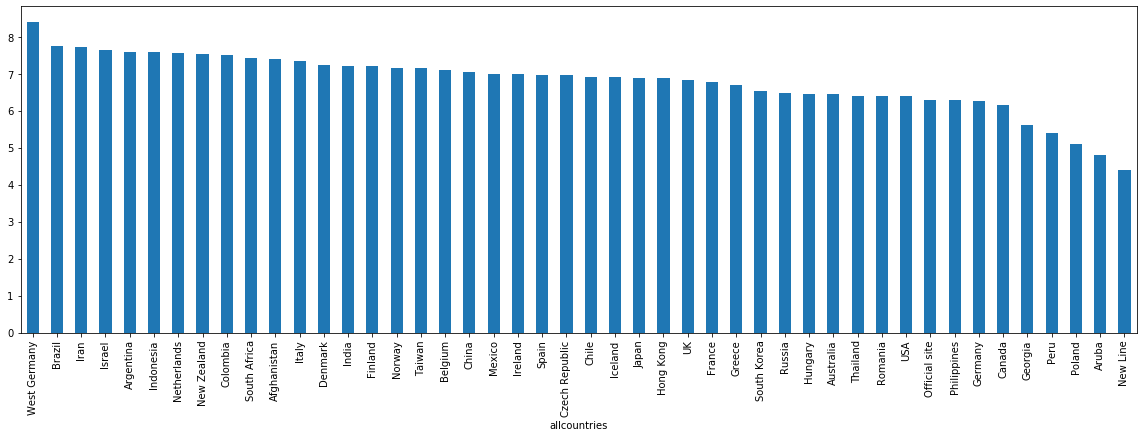

In [44]:
data.groupby('allcountries')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar',figsize=[20,6])

In [45]:
data.groupby('country')['imdb_score'].mean().sort_values(ascending=False)

country
UK       6.834304
OTHER    6.675439
USA      6.384154
Name: imdb_score, dtype: float64

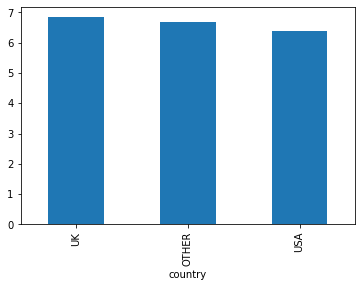

In [46]:
data.groupby('country')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar')

For the countries, we could see the west gaemmany had the best average IMDB score. The USA Producted most of the movies, but there are a lot of low score movies. This lower the IMDb score of USA's movies.  The USA has a low raking in both for all countries or for the three-country. 

#### b. movie year

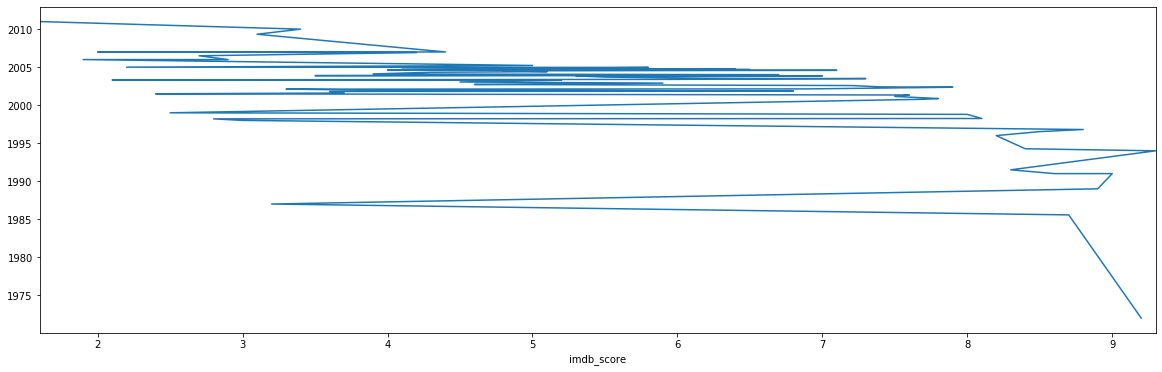

In [47]:
data.groupby('imdb_score')['title_year'].mean().sort_values(ascending=False).plot(kind='line',figsize=[20,6])

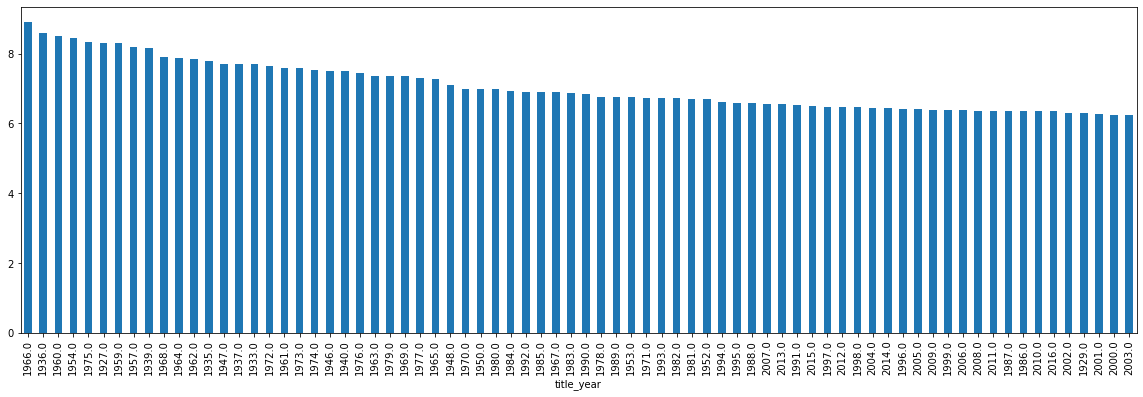

In [48]:
data.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar',figsize=[20,6])

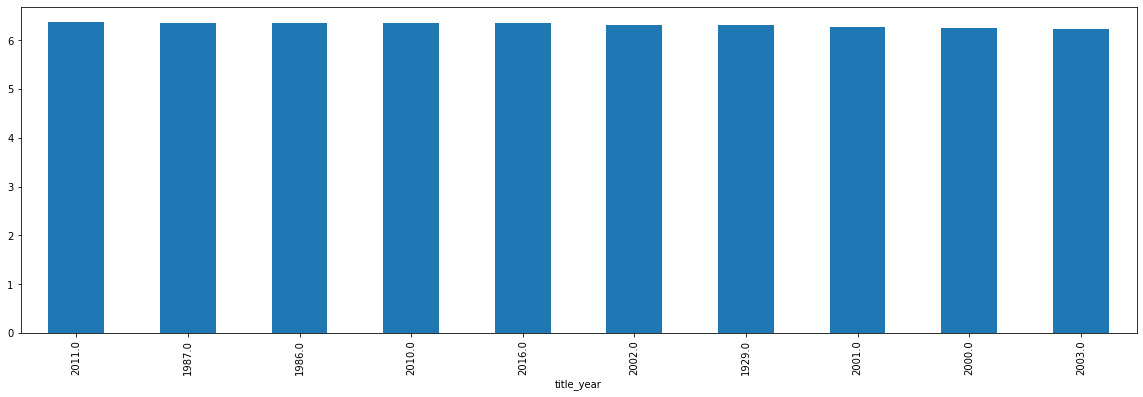

In [49]:
data.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False).tail(10).plot(kind='bar',figsize=[20,6])

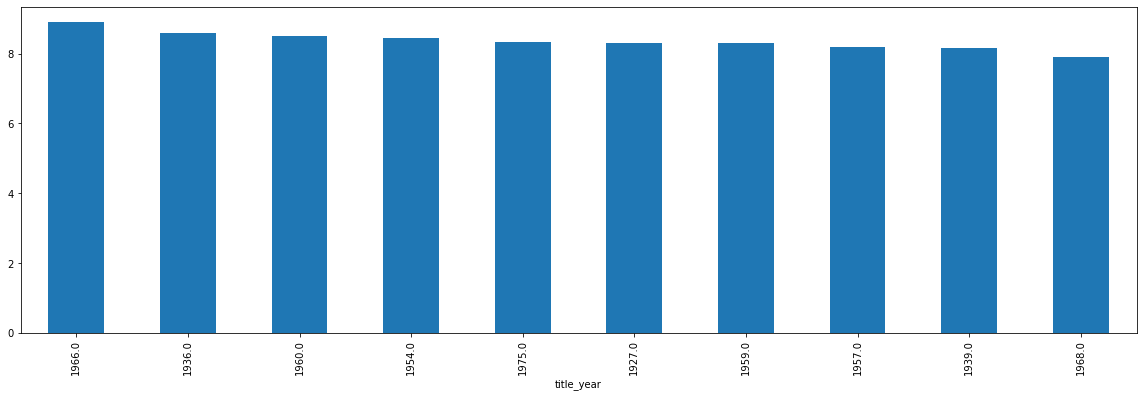

In [50]:
data.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar',figsize=[20,6])

For the title year which is movie year. We could see that the year 1966 have the highest average IMDb score and the year 2003 had the lowest IMDb score. We also can see the movie after the year 2000 usually had a low IMDb score. and movie before the year 1970 usually has a higher IMDb score.  

#### c. gross and budget

In [51]:
data.groupby('imdb_score')['gross'].mean().sort_values(ascending=False).head(20)

imdb_score
9.0    2.953080e+08
8.8    2.526560e+08
8.7    1.627810e+08
8.9    1.467791e+08
9.2    1.348220e+08
8.5    1.303752e+08
8.1    1.111964e+08
8.3    1.047963e+08
7.9    9.593458e+07
8.2    8.546030e+07
8.6    8.439512e+07
8.0    8.324951e+07
7.8    7.654232e+07
1.6    7.300094e+07
7.6    6.876859e+07
7.3    6.295922e+07
7.5    6.283317e+07
8.4    5.985721e+07
3.7    5.890407e+07
7.2    5.872160e+07
Name: gross, dtype: float64

In [52]:
data.groupby('imdb_score')['gross'].mean().sort_values(ascending=False).tail(20)

imdb_score
2.7    2.496144e+07
3.5    2.257412e+07
3.8    2.245322e+07
5.3    1.952493e+07
4.7    1.939327e+07
3.3    1.819758e+07
4.0    1.814446e+07
2.2    1.701065e+07
2.3    1.505900e+07
3.6    1.419519e+07
2.4    1.356588e+07
1.9    1.164199e+07
3.1    1.126186e+07
3.9    1.103776e+07
3.0    9.455254e+06
2.8    8.524723e+06
3.2    7.888703e+06
2.9    7.392634e+06
2.0    5.694308e+06
2.1    5.401735e+06
Name: gross, dtype: float64

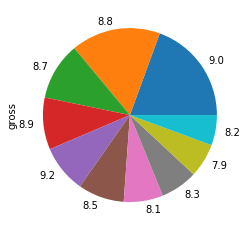

In [53]:
data.groupby('imdb_score')['gross'].mean().sort_values(ascending=False).head(10).plot(kind='pie')

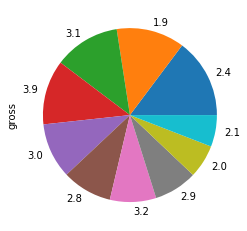

In [54]:
data.groupby('imdb_score')['gross'].mean().sort_values(ascending=False).tail(10).plot(kind='pie')

In [55]:
data.groupby('imdb_score')['budget'].mean().sort_values(ascending=False).head(20)

imdb_score
8.4    1.909133e+08
9.0    9.900000e+07
2.2    8.400000e+07
8.8    7.780000e+07
7.7    7.472133e+07
3.7    7.060000e+07
8.1    6.400667e+07
6.0    5.757865e+07
7.1    5.365036e+07
6.9    5.166917e+07
2.4    4.900000e+07
8.5    4.862037e+07
4.2    4.792500e+07
5.8    4.630619e+07
7.9    4.558140e+07
3.8    4.470000e+07
6.4    4.454165e+07
8.3    4.404223e+07
5.5    4.401579e+07
6.6    4.387223e+07
Name: budget, dtype: float64

In [56]:
data.groupby('imdb_score')['budget'].mean().sort_values(ascending=False).tail(20)

imdb_score
2.7    2.575000e+07
4.5    2.550475e+07
9.3    2.500000e+07
3.3    2.424444e+07
4.6    2.403103e+07
4.1    2.400158e+07
1.9    2.250000e+07
4.0    2.187500e+07
2.8    1.880000e+07
3.5    1.838889e+07
2.5    1.800000e+07
2.3    1.666667e+07
2.9    1.550000e+07
3.9    1.385556e+07
2.1    1.320000e+07
1.6    1.300000e+07
3.1    9.166667e+06
2.0    7.000000e+06
9.2    6.000000e+06
3.2    3.000000e+06
Name: budget, dtype: float64

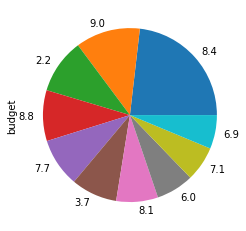

In [57]:
data.groupby('imdb_score')['budget'].mean().sort_values(ascending=False).head(10).plot(kind='pie')

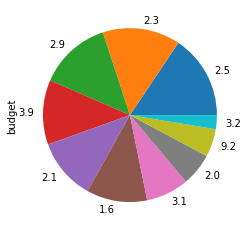

In [58]:
data.groupby('imdb_score')['budget'].mean().sort_values(ascending=False).tail(10).plot(kind='pie')

For the gross and budget, we use the IMDb score to see the gross and budget. We get that the higher IMDb score movies usually had a good gross and lower IMDb score movies had a bad gross.  But we can not get a trend for the budget. The high IMDb score movies could have a large budget or a small one, and it is the same for low IMDb score movies of budget. This could tell us the gross could be used to predict the movies' IMDb score, but the budget is not a very good variable that use to predict the movies' score. 

#### d. facebook likes (actors)  

In [59]:
data.groupby('imdb_score')['actor_1_facebook_likes'].mean().sort_values(ascending=False).head(20)

imdb_score
9.0    22500.000000
8.8    16400.000000
9.2    14000.000000
8.2    12280.708333
7.2    12111.291971
8.9    12000.000000
9.3    11000.000000
5.6    10773.119565
8.3    10116.875000
8.7     9884.571429
8.1     9875.375000
7.9     9705.780000
8.5     9419.052632
7.3     9247.963235
6.7     9214.248555
7.5     8881.619565
6.5     8674.733766
7.4     8673.473684
8.6     8540.750000
7.8     8371.088608
Name: actor_1_facebook_likes, dtype: float64

In [60]:
data.groupby('imdb_score')['actor_1_facebook_likes'].mean().sort_values(ascending=False).tail(20)

imdb_score
4.4    2949.550000
4.1    2719.210526
3.3    2634.333333
4.3    2517.500000
4.2    2046.416667
2.7    1325.500000
3.7    1019.400000
3.6     970.000000
2.5     899.000000
3.0     779.666667
1.9     759.500000
2.3     745.333333
2.8     726.600000
2.0     692.000000
2.9     669.000000
3.2     641.000000
2.1     617.666667
1.6     569.000000
2.2     490.000000
2.4     430.000000
Name: actor_1_facebook_likes, dtype: float64

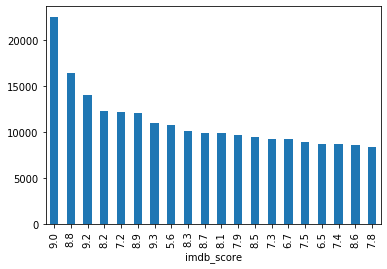

In [61]:
data.groupby('imdb_score')['actor_1_facebook_likes'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

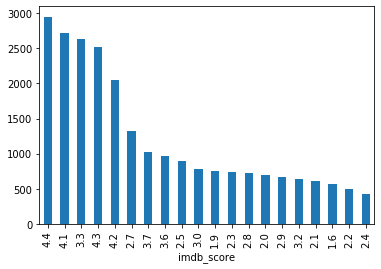

In [62]:
data.groupby('imdb_score')['actor_1_facebook_likes'].mean().sort_values(ascending=False).tail(20).plot(kind='bar')

In [63]:
data.groupby('imdb_score')['actor_2_facebook_likes'].mean().sort_values(ascending=False).head(20)

imdb_score
9.0    13500.000000
9.2    10000.000000
8.8     6716.200000
8.6     4829.875000
8.5     4464.842105
5.2     3979.543478
3.4     3903.666667
7.8     3692.594937
8.3     3056.791667
8.1     2853.437500
7.7     2775.722222
8.2     2763.833333
7.5     2517.347826
6.7     2500.080925
6.5     2266.694805
7.1     2262.297101
7.3     2260.801471
7.4     2219.610526
7.2     2206.992701
5.6     2131.086957
Name: actor_2_facebook_likes, dtype: float64

In [64]:
data.groupby('imdb_score')['actor_2_facebook_likes'].mean().sort_values(ascending=False).tail(20)

imdb_score
8.9    647.000000
5.0    640.612903
4.7    607.380952
4.5    595.450000
3.6    588.700000
2.0    585.000000
3.5    558.444444
2.8    551.000000
2.9    539.500000
3.7    518.000000
3.9    513.111111
1.9    504.000000
3.3    495.222222
2.7    488.750000
3.0    480.333333
2.2    294.000000
2.1    292.333333
3.2    168.000000
2.4     89.500000
1.6     69.000000
Name: actor_2_facebook_likes, dtype: float64

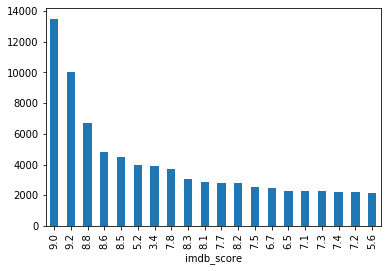

In [65]:
data.groupby('imdb_score')['actor_2_facebook_likes'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

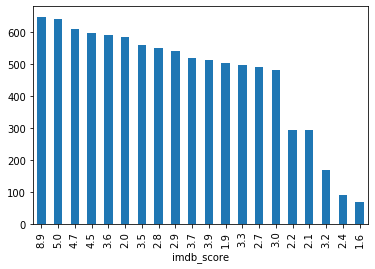

In [66]:
data.groupby('imdb_score')['actor_2_facebook_likes'].mean().sort_values(ascending=False).tail(20).plot(kind='bar')

In [67]:
data.groupby('imdb_score')['actor_3_facebook_likes'].mean().sort_values(ascending=False).head(20)

imdb_score
9.0    7000.000000
8.8    5025.800000
9.2    3000.000000
8.5    2735.526316
8.6    2590.500000
8.2    1471.875000
8.3    1324.875000
5.4    1045.246575
7.5     944.358696
6.7     931.300578
7.3     908.044118
6.0     902.427083
8.1     900.020833
7.1     893.666667
6.1     872.500000
4.6     837.586207
7.2     830.824818
8.0     821.698113
7.8     801.886076
2.5     782.000000
Name: actor_3_facebook_likes, dtype: float64

In [68]:
data.groupby('imdb_score')['actor_3_facebook_likes'].mean().sort_values(ascending=False).tail(20)

imdb_score
5.3    425.492537
2.8    425.200000
4.7    421.904762
3.6    403.500000
4.2    377.916667
8.9    377.250000
8.7    366.285714
3.4    364.000000
8.4    335.000000
3.9    333.444444
3.3    327.888889
3.7    325.400000
2.7    297.500000
3.0    261.333333
1.9    253.000000
2.1    236.000000
2.2    227.000000
3.2    152.000000
2.4     42.000000
1.6     41.000000
Name: actor_3_facebook_likes, dtype: float64

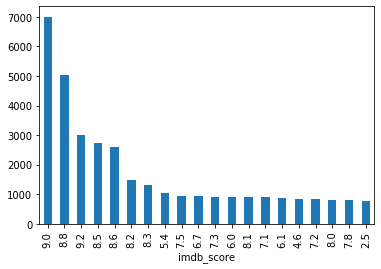

In [69]:
data.groupby('imdb_score')['actor_3_facebook_likes'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

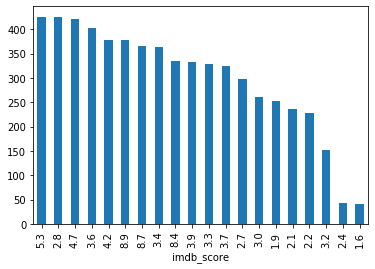

In [70]:
data.groupby('imdb_score')['actor_3_facebook_likes'].mean().sort_values(ascending=False).tail(20).plot(kind='bar')

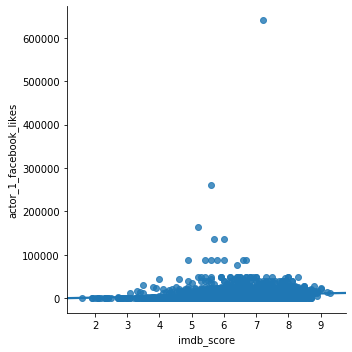

In [71]:
sns.lmplot("imdb_score", "actor_1_facebook_likes", data)

From the analytics of actors' facebook like, we could know that usually, the higher IMDb score has higher actors facebook likes. especially for the actor 1 facebook likes, the lowest 20 lmdb score movies have the less actor 1 facebook likes. However, for actor 2, the are 8.9 average IMDb score movies in the last 20 facebook likes, and the actor 3 variable has 8.4, 8.7 and 8.9. I think that could mean actor 1 facebook likes is more important than actor 2 facebook likes and then actor 3 facebook likes. However, the actors' facebook likes still a good variable to predict the movies' IMDb score.

#### e. director_facebook_likes

In [72]:
data.groupby('imdb_score')['director_facebook_likes'].mean().sort_values(ascending=False).head(20)

imdb_score
9.0    11000.000000
8.8     8776.600000
8.6     7954.000000
8.9     7500.000000
8.5     6793.631579
8.3     3760.250000
8.7     2603.142857
8.2     2583.208333
8.1     2419.791667
8.0     2168.264151
7.9     1694.080000
7.8     1584.784810
8.4     1568.933333
7.7     1392.855556
7.5     1339.500000
7.4     1336.957895
7.6     1229.660000
7.3     1110.816176
7.2     1104.175182
6.4      835.033113
Name: director_facebook_likes, dtype: float64

In [73]:
data.groupby('imdb_score')['director_facebook_likes'].mean().sort_values(ascending=False).tail(20)

imdb_score
2.5    84.000000
1.9    83.000000
2.4    83.000000
4.6    70.758621
2.0    70.000000
3.1    65.666667
2.1    64.666667
4.1    64.368421
2.8    56.200000
2.7    54.500000
4.4    51.050000
3.9    48.444444
4.0    40.000000
4.7    34.761905
3.3    29.222222
3.6    15.400000
2.2     6.000000
3.2     4.000000
9.2     0.000000
9.3     0.000000
Name: director_facebook_likes, dtype: float64

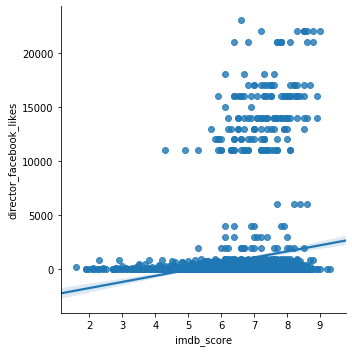

In [74]:
sns.lmplot("imdb_score", "director_facebook_likes", data)

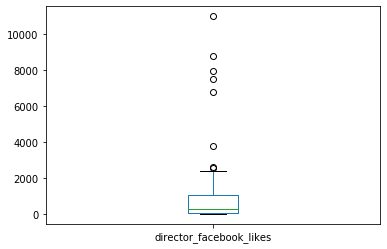

In [75]:
data.groupby('imdb_score')['director_facebook_likes'].mean().sort_values(ascending=False).plot.box()

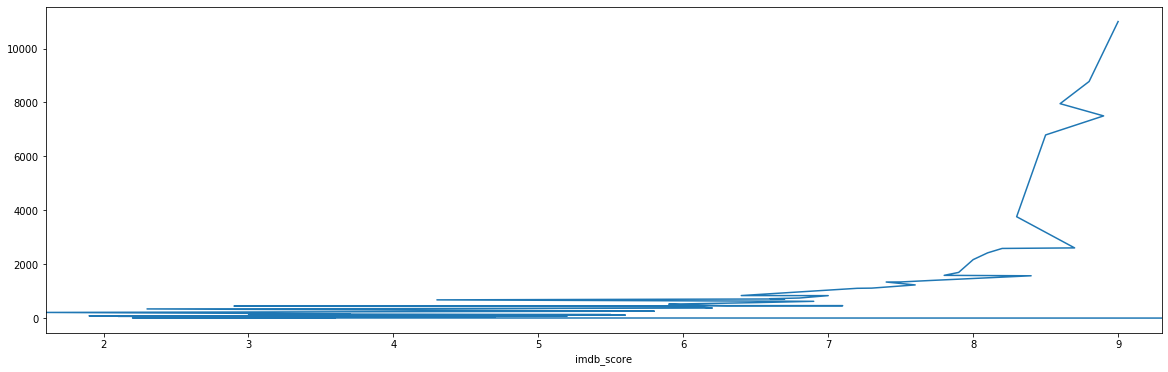

In [76]:
data.groupby('imdb_score')['director_facebook_likes'].mean().sort_values(ascending=False).plot(kind='line',figsize=[20,6])

For the director facebook likes, we could see that many directors only have a little bit of facebook likes at all IMDb score levels, the reason for this may be that for the old movies' director. They do not have the facebook account, this also could happen for actros facebook likes. This could cause that the 9.2 and 9.3 IMDb score movies have 0 facebook likes for directors. However, we also could see that higher IMDb scores movies had higher director facebook likes for the plots and table. Therefore, director facebook likes could be a variable to predict the movies' IMDb scores. 

#### f. num_voted_users and cast_total_facebook_likes

In [77]:
data['imdb_score'].sort_values().sort_values(ascending=False).head(20)


1937    9.3
3466    9.2
2837    9.0
66      9.0
4498    8.9
1874    8.9
339     8.9
3355    8.9
270     8.8
2051    8.8
97      8.8
836     8.8
683     8.8
3867    8.7
4029    8.7
1903    8.7
340     8.7
4747    8.7
654     8.7
3024    8.7
Name: imdb_score, dtype: float64

In [78]:
data.groupby('imdb_score')['num_voted_users'].mean().sort_values(ascending=False).head(20)

imdb_score
9.3    1.689764e+06
9.0    1.233548e+06
8.8    1.228678e+06
9.2    1.155770e+06
8.9    9.772318e+05
8.7    7.714619e+05
8.6    7.256066e+05
8.5    6.239076e+05
8.4    4.357000e+05
8.3    4.183244e+05
8.2    3.918663e+05
8.1    3.914107e+05
8.0    2.699348e+05
7.9    2.457966e+05
7.8    1.969816e+05
7.7    1.703402e+05
7.6    1.634931e+05
7.5    1.292034e+05
7.3    1.196545e+05
7.0    1.145810e+05
Name: num_voted_users, dtype: float64

In [79]:
data.groupby('imdb_score')['num_voted_users'].mean().sort_values(ascending=False).tail(20)

imdb_score
5.1    27933.142857
5.3    25521.432836
4.1    25477.210526
3.3    24634.777778
3.8    22342.100000
2.9    21483.500000
4.4    21381.050000
2.5    19547.000000
4.7    19210.714286
3.5    18141.888889
4.0    18055.750000
2.1    17241.666667
4.5    16949.200000
2.0    13815.000000
3.1    13140.333333
3.6    12893.100000
3.9    12787.777778
3.0    11541.333333
2.8    10124.000000
3.2     8465.000000
Name: num_voted_users, dtype: float64

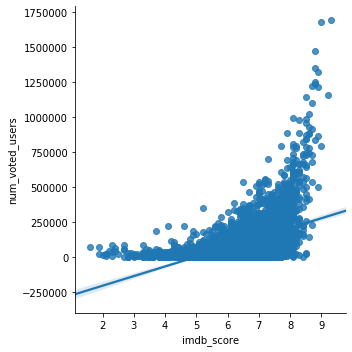

In [80]:
sns.lmplot("imdb_score", "num_voted_users", data)

In [81]:
data.groupby('imdb_score')['cast_total_facebook_likes'].mean().sort_values(ascending=False).head(20)

imdb_score
9.0    48881.000000
8.8    29001.800000
9.2    28122.000000
8.5    19336.578947
8.2    17872.333333
8.6    17177.875000
7.2    16099.160584
8.3    15684.541667
8.1    14858.354167
5.6    14654.836957
5.2    13870.695652
6.7    13704.809249
7.8    13617.341772
8.9    13578.250000
7.5    13576.663043
9.3    13495.000000
7.3    13259.338235
6.5    12650.084416
7.9    12493.700000
7.4    12320.084211
Name: cast_total_facebook_likes, dtype: float64

In [82]:
data.groupby('imdb_score')['cast_total_facebook_likes'].mean().sort_values(ascending=False).tail(20)

imdb_score
4.4    5079.900000
3.9    4993.777778
4.7    4959.047619
3.3    4043.444444
4.2    3874.833333
2.3    3448.000000
2.0    3128.000000
2.7    3116.250000
3.6    2976.100000
2.5    2936.000000
3.7    2621.200000
2.9    2341.000000
2.8    2249.200000
1.9    2100.000000
3.0    1963.000000
2.1    1766.333333
3.2    1389.000000
2.2    1195.000000
1.6     714.000000
2.4     628.500000
Name: cast_total_facebook_likes, dtype: float64

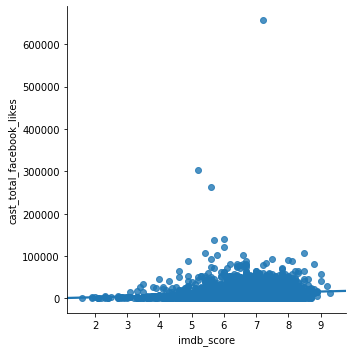

In [83]:
sns.lmplot("imdb_score", "cast_total_facebook_likes", data)

For the number voted users, we could see from the plot the number voted users vs imdb scores is obviously proportional. This tells us, the higher IMDb score movies usually have more people vote for it. It is the same for cast total facebook likes, just it is not obvious. Therefore, I think the number voted users are good for predicting the movies' IMDb score

#### g . facenumber_in_poster

In [84]:
data.groupby('imdb_score')['facenumber_in_poster'].mean().sort_values(ascending=False).head(20)

imdb_score
3.4    4.333333
2.3    4.000000
2.1    3.000000
3.5    2.444444
5.7    2.373494
4.1    2.368421
4.3    2.111111
3.8    2.000000
8.7    2.000000
2.5    2.000000
2.9    2.000000
3.6    1.900000
5.5    1.815789
6.9    1.774436
5.3    1.686567
5.0    1.677419
3.1    1.666667
4.4    1.650000
5.8    1.622523
6.1    1.592857
Name: facenumber_in_poster, dtype: float64

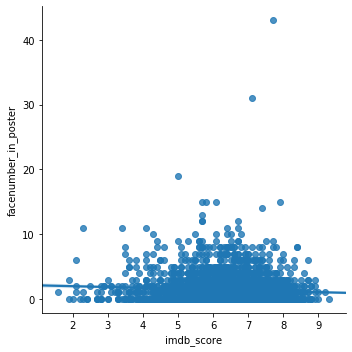

In [85]:
sns.lmplot("imdb_score", "facenumber_in_poster", data)

In [86]:
data.groupby('facenumber_in_poster')['imdb_score'].mean().sort_values(ascending=False).head(20)

facenumber_in_poster
43.000000    7.700000
14.000000    7.400000
31.000000    7.100000
0.000000     6.519653
1.000000     6.491336
3.000000     6.406993
2.000000     6.395131
6.000000     6.375439
15.000000    6.375000
1.384698     6.316667
8.000000     6.309375
4.000000     6.277070
5.000000     6.222078
7.000000     6.200000
9.000000     6.066667
12.000000    6.033333
10.000000    5.933333
13.000000    5.700000
19.000000    5.000000
11.000000    4.580000
Name: imdb_score, dtype: float64

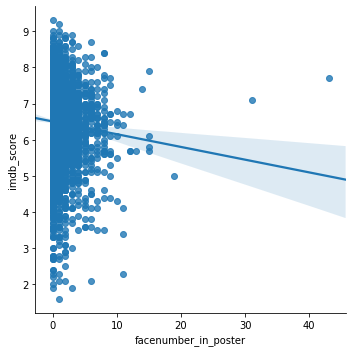

In [87]:
sns.lmplot('facenumber_in_poster', 'imdb_score', data)

From the tables and plots, we could get that the face number in the poster with the IMDb score is irregular. So, I think this is not a good variable for predicting the movies' IMDb score.

#### h. content_rating

In [88]:
data.groupby('content_rating')['imdb_score'].mean().sort_values(ascending=False)

content_rating
R        6.641975
G        6.507865
NC-17    6.406667
PG       6.289716
PG-13    6.270492
Name: imdb_score, dtype: float64

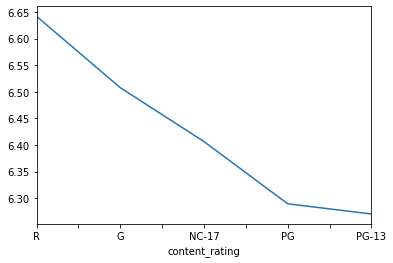

In [89]:
data.groupby('content_rating')['imdb_score'].mean().sort_values(ascending=False).plot(kind='line')

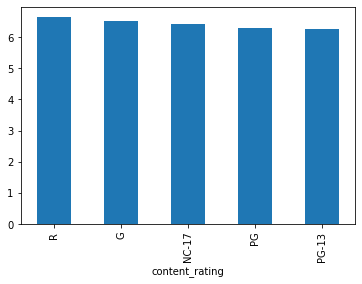

In [90]:
data.groupby('content_rating')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar')

For the content_rating, we could see that from R to G to NC-17 to PG to PG-13 is a decreasing raking of IMDb score. But, form the bar plot and table, we could get that they are all very close, form the top score to lowest score, only is 0.7 difference. Therefore, I do not think the content rating is a good variable to predict the movies' IMDb score. 

In [91]:
data.groupby('imdb_score')['facenumber_in_poster'].mean().sort_values(ascending=False).head(20)

imdb_score
3.4    4.333333
2.3    4.000000
2.1    3.000000
3.5    2.444444
5.7    2.373494
4.1    2.368421
4.3    2.111111
3.8    2.000000
8.7    2.000000
2.5    2.000000
2.9    2.000000
3.6    1.900000
5.5    1.815789
6.9    1.774436
5.3    1.686567
5.0    1.677419
3.1    1.666667
4.4    1.650000
5.8    1.622523
6.1    1.592857
Name: facenumber_in_poster, dtype: float64

# 5. Correlation analysis
## Perform correlation analysis and discuss the results. Again, what variables are correlated to imdb_score? How are some key variables correlated to each other?


#### a. correlation of imdb_score

In [92]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3.731000e+03,3.731000e+03,3731.000000,3731.000000,3731.000000,3.731000e+03,3731.000000,3731.000000,3731.000000,3731.000000,3.731000e+03,3731.000000
mean,162.514071,109.930314,797.798713,744.865720,7580.906995,5.094861e+07,1.028527e+05,11244.594747,1.384698,325.364514,4.176423e+07,2003.013401,1955.260520,6.457036,9027.670866,9.184374e+06,624.855745
std,122.617903,22.632984,3060.594061,1833.166621,15525.128762,6.898431e+07,1.513994e+05,18999.947608,2.050026,404.384003,1.078257e+08,9.873154,4476.779345,1.058939,21324.466988,1.142811e+08,13218.767479
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,0.000000,-4.199788e+09,0.001800
25%,73.000000,95.000000,10.000000,187.500000,726.500000,7.156829e+06,1.765900e+04,1852.000000,0.000000,103.000000,1.000000e+07,1999.000000,368.000000,5.900000,0.000000,-1.020737e+07,46.502910
50%,134.000000,106.000000,58.000000,430.000000,1000.000000,2.804554e+07,5.065300e+04,3921.000000,1.000000,202.000000,2.400000e+07,2005.000000,664.000000,6.600000,204.000000,1.081498e+06,108.334422
75%,219.000000,120.000000,224.000000,686.000000,12000.000000,6.554653e+07,1.237490e+05,15939.500000,2.000000,388.500000,5.000000e+07,2010.000000,971.000000,7.200000,11000.000000,2.475147e+07,223.472177
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.300000,349000.000000,5.235058e+08,719448.553333


In [93]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per
num_critic_for_reviews,1.000000,0.233025,0.181812,0.247702,0.167219,0.462805,0.596559,0.236145,-0.031078,0.565931,0.168277,0.403130,0.254325,0.352909,0.704208,0.120595,0.032928
duration,0.233025,1.000000,0.184664,0.124428,0.085510,0.246260,0.342237,0.121096,0.029097,0.348983,0.140349,-0.136415,0.129677,0.369339,0.221531,0.016230,-0.032326
director_facebook_likes,0.181812,0.184664,1.000000,0.119538,0.091186,0.138764,0.306049,0.120201,-0.046886,0.225152,0.040415,-0.048381,0.116132,0.195026,0.165274,0.045631,-0.006240
actor_3_facebook_likes,0.247702,0.124428,0.119538,1.000000,0.248670,0.279434,0.260000,0.479938,0.106448,0.204075,0.089975,0.111624,0.543913,0.069904,0.263305,0.083784,-0.012284
actor_1_facebook_likes,0.167219,0.085510,0.091186,0.248670,1.000000,0.141816,0.178861,0.946830,0.060125,0.125085,0.046175,0.090720,0.386625,0.094249,0.126551,0.042039,-0.015248
gross,0.462805,0.246260,0.138764,0.279434,0.141816,1.000000,0.627698,0.225964,-0.029203,0.548246,0.223509,0.040638,0.239661,0.218076,0.361983,0.392753,0.019277
num_voted_users,0.596559,0.342237,0.306049,0.260000,0.178861,0.627698,1.000000,0.244823,-0.033330,0.785316,0.144952,0.015468,0.239729,0.480849,0.522044,0.242138,0.010321
cast_total_facebook_likes,0.236145,0.121096,0.120201,0.479938,0.946830,0.225964,0.244823,1.000000,0.082477,0.180349,0.072626,0.120557,0.635391,0.107683,0.198983,0.067877,-0.018317
facenumber_in_poster,-0.031078,0.029097,-0.046886,0.106448,0.060125,-0.029203,-0.033330,0.082477,1.000000,-0.077612,-0.024836,0.069050,0.071629,-0.068178,0.012259,0.005806,-0.012854
num_user_for_reviews,0.565931,0.348983,0.225152,0.204075,0.125085,0.548246,0.785316,0.180349,-0.077612,1.000000,0.148720,0.012556,0.188077,0.328116,0.380944,0.190623,0.068598


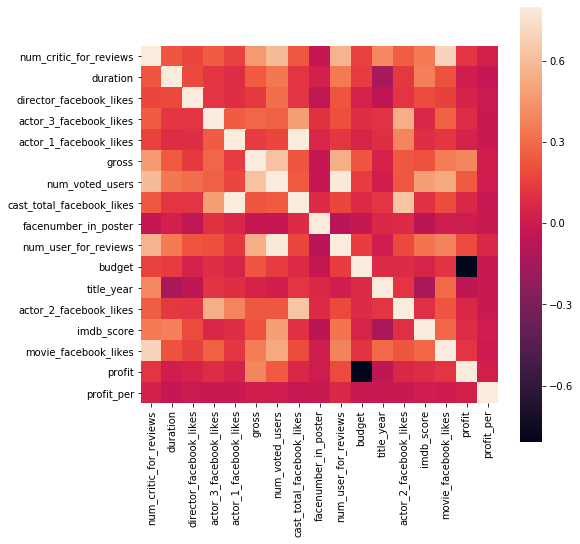

In [94]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),vmax=.8, square=True)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 26 columns):
director_name                3731 non-null object
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_2_name                 3731 non-null object
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
genres                       3731 non-null object
actor_1_name                 3731 non-null object
movie_title                  3731 non-null object
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
actor_3_name                 3731 non-null object
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
country                      3731 non-null object
content_rating               3731 non

In [96]:
data['country'].value_counts()

USA      2966
OTHER     456
UK        309
Name: country, dtype: int64

In [97]:
data = data.replace({'country': 'USA'}, {'country': 1}) 
data = data.replace({'country': 'OTHER'}, {'country': 2}) 
data = data.replace({'country': 'UK'}, {'country': 3}) 
data['country'].value_counts()

1    2966
2     456
3     309
Name: country, dtype: int64

In [98]:
data['content_rating'].value_counts()

R        1782
PG-13    1281
PG        564
G          89
NC-17      15
Name: content_rating, dtype: int64

In [99]:
data = data.replace({'content_rating': 'R'}, {'content_rating': 1}) 
data = data.replace({'content_rating': 'PG-13'}, {'content_rating': 2}) 
data = data.replace({'content_rating': 'PG'}, {'content_rating': 3}) 
data = data.replace({'content_rating': 'G'}, {'content_rating': 4}) 
data = data.replace({'content_rating': 'NC-17'}, {'content_rating': 5}) 
data['content_rating'].value_counts()

1    1782
2    1281
3     564
4      89
5      15
Name: content_rating, dtype: int64

In [100]:
data = pd.get_dummies(data, columns=['country', 'content_rating'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 32 columns):
director_name                3731 non-null object
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_2_name                 3731 non-null object
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
genres                       3731 non-null object
actor_1_name                 3731 non-null object
movie_title                  3731 non-null object
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
actor_3_name                 3731 non-null object
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 no

In [101]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per,country_1,country_2,country_3,content_rating_1,content_rating_2,content_rating_3,content_rating_4,content_rating_5
num_critic_for_reviews,1.000000,0.233025,0.181812,0.247702,0.167219,0.462805,0.596559,0.236145,-0.031078,0.565931,0.168277,0.403130,0.254325,0.352909,0.704208,0.120595,0.032928,-0.006697,-0.025392,0.039987,0.000087,0.103452,-0.112697,-0.057589,-0.000128
duration,0.233025,1.000000,0.184664,0.124428,0.085510,0.246260,0.342237,0.121096,0.029097,0.348983,0.140349,-0.136415,0.129677,0.369339,0.221531,0.016230,-0.032326,-0.042752,0.021326,0.037281,0.041262,0.061044,-0.096536,-0.081015,-0.041917
director_facebook_likes,0.181812,0.184664,1.000000,0.119538,0.091186,0.138764,0.306049,0.120201,-0.046886,0.225152,0.040415,-0.048381,0.116132,0.195026,0.165274,0.045631,-0.006240,0.077131,-0.053273,-0.049675,0.006966,0.006357,-0.002167,-0.031934,-0.013412
actor_3_facebook_likes,0.247702,0.124428,0.119538,1.000000,0.248670,0.279434,0.260000,0.479938,0.106448,0.204075,0.089975,0.111624,0.543913,0.069904,0.263305,0.083784,-0.012284,0.075243,-0.068457,-0.028866,-0.079305,0.093640,0.001896,-0.029067,-0.017283
actor_1_facebook_likes,0.167219,0.085510,0.091186,0.248670,1.000000,0.141816,0.178861,0.946830,0.060125,0.125085,0.046175,0.090720,0.386625,0.094249,0.126551,0.042039,-0.015248,0.073728,-0.066792,-0.028624,-0.032666,0.059910,-0.015048,-0.039681,-0.010818
gross,0.462805,0.246260,0.138764,0.279434,0.141816,1.000000,0.627698,0.225964,-0.029203,0.548246,0.223509,0.040638,0.239661,0.218076,0.361983,0.392753,0.019277,0.175792,-0.154615,-0.073763,-0.281317,0.167874,0.143278,0.076847,-0.035450
num_voted_users,0.596559,0.342237,0.306049,0.260000,0.178861,0.627698,1.000000,0.244823,-0.033330,0.785316,0.144952,0.015468,0.239729,0.480849,0.522044,0.242138,0.010321,0.065165,-0.072501,-0.009296,-0.019578,0.063123,-0.053177,0.002420,-0.023931
cast_total_facebook_likes,0.236145,0.121096,0.120201,0.479938,0.946830,0.225964,0.244823,1.000000,0.082477,0.180349,0.072626,0.120557,0.635391,0.107683,0.198983,0.067877,-0.018317,0.097182,-0.088133,-0.037620,-0.049572,0.080882,-0.014941,-0.046924,-0.017876
facenumber_in_poster,-0.031078,0.029097,-0.046886,0.106448,0.060125,-0.029203,-0.033330,0.082477,1.000000,-0.077612,-0.024836,0.069050,0.071629,-0.068178,0.012259,0.005806,-0.012854,0.040904,-0.038094,-0.014647,-0.026841,0.071804,-0.027086,-0.067900,-0.009858
num_user_for_reviews,0.565931,0.348983,0.225152,0.204075,0.125085,0.548246,0.785316,0.180349,-0.077612,1.000000,0.148720,0.012556,0.188077,0.328116,0.380944,0.190623,0.068598,0.033821,-0.046705,0.005961,-0.013034,0.093101,-0.086753,-0.040550,-0.006835


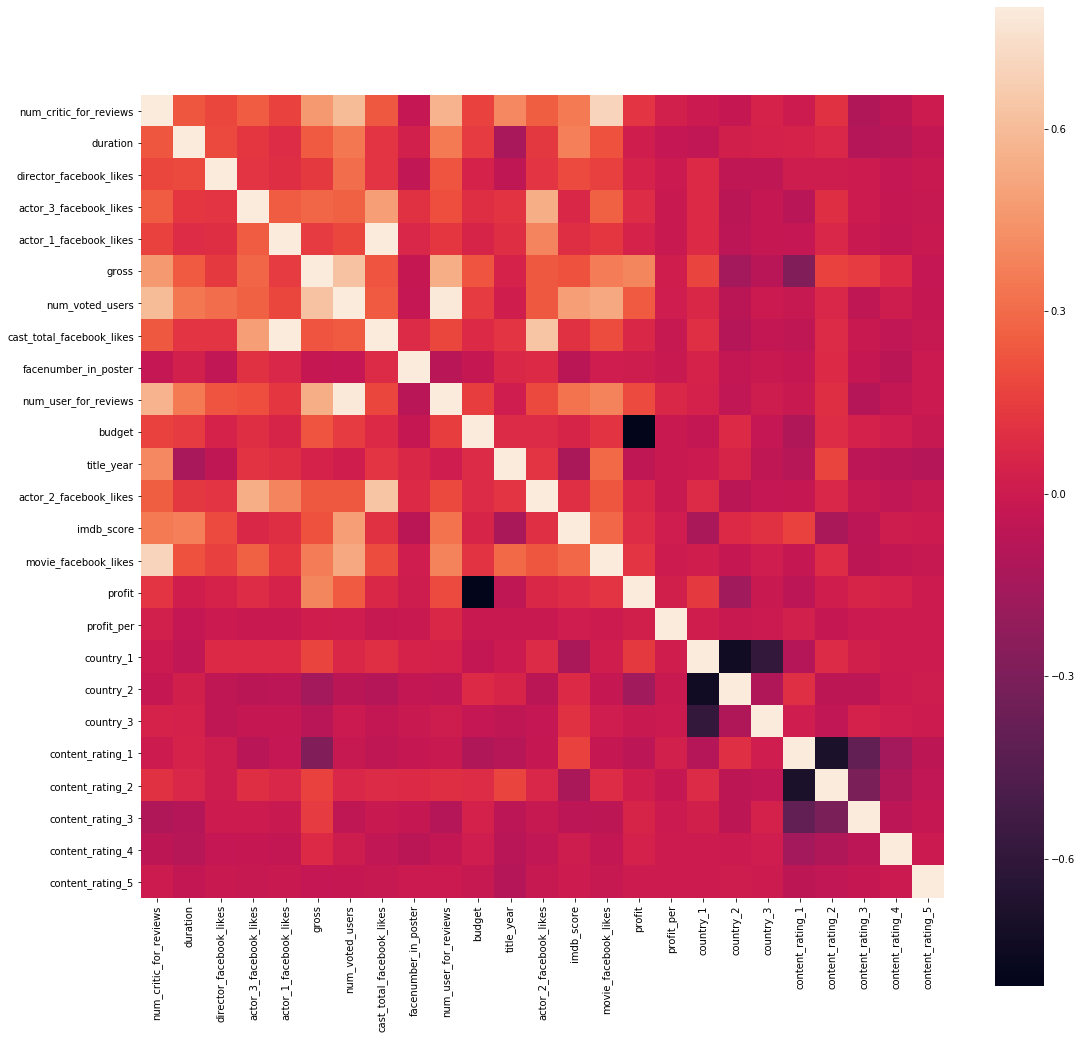

In [102]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),vmax=.8, square=True)

In [103]:
data2= data.corr()
data_score= data2['imdb_score']

In [104]:
data_score

num_critic_for_reviews       0.352909
duration                     0.369339
director_facebook_likes      0.195026
actor_3_facebook_likes       0.069904
actor_1_facebook_likes       0.094249
gross                        0.218076
num_voted_users              0.480849
cast_total_facebook_likes    0.107683
facenumber_in_poster        -0.068178
num_user_for_reviews         0.328116
budget                       0.048667
title_year                  -0.131679
actor_2_facebook_likes       0.102462
imdb_score                   1.000000
movie_facebook_likes         0.286216
profit                       0.085720
profit_per                   0.009009
country_1                   -0.135538
country_2                    0.076970
country_3                    0.107072
content_rating_1             0.167019
content_rating_2            -0.127397
content_rating_3            -0.066688
content_rating_4             0.007505
content_rating_5            -0.003022
Name: imdb_score, dtype: float64

In [105]:
data[['imdb_score','gross']].corr()

,imdb_score,gross
imdb_score,1.000000,0.218076
gross,0.218076,1.000000


We set a correlation bigger or smaller than 0.3 to be meaningful. From the plot and table, we get those variables are meaningful:
- num_critic_for_reviews
- num_voted_users
- num_user_for_reviews
- duration


Those variables have a correlation bigger than 0.3, and 'movie_facebook_likes' have a correlation close to 0.3. We could see that the actions in the IMDb website are very important for a higher IMDb score of a movie. The variable those we guessed earlier, such as facebook likes of actors, director, and entire cast or gross and title years. Those are not highly correlated to the IMDb score. However, the longer the duration usually stands for the big production of the movie. This seems like the only variable that could be controlled by the movie crew for highly correlated to the IMDb score.

#### b. How are some key variables correlated to each other?

In [106]:
data_num_voted_users= data2['num_voted_users']
data_num_voted_users

num_critic_for_reviews       0.596559
duration                     0.342237
director_facebook_likes      0.306049
actor_3_facebook_likes       0.260000
actor_1_facebook_likes       0.178861
gross                        0.627698
num_voted_users              1.000000
cast_total_facebook_likes    0.244823
facenumber_in_poster        -0.033330
num_user_for_reviews         0.785316
budget                       0.144952
title_year                   0.015468
actor_2_facebook_likes       0.239729
imdb_score                   0.480849
movie_facebook_likes         0.522044
profit                       0.242138
profit_per                   0.010321
country_1                    0.065165
country_2                   -0.072501
country_3                   -0.009296
content_rating_1            -0.019578
content_rating_2             0.063123
content_rating_3            -0.053177
content_rating_4             0.002420
content_rating_5            -0.023931
Name: num_voted_users, dtype: float64

In [107]:
data_num_critic_for_reviews =  data2['num_critic_for_reviews']
data_num_critic_for_reviews

num_critic_for_reviews       1.000000
duration                     0.233025
director_facebook_likes      0.181812
actor_3_facebook_likes       0.247702
actor_1_facebook_likes       0.167219
gross                        0.462805
num_voted_users              0.596559
cast_total_facebook_likes    0.236145
facenumber_in_poster        -0.031078
num_user_for_reviews         0.565931
budget                       0.168277
title_year                   0.403130
actor_2_facebook_likes       0.254325
imdb_score                   0.352909
movie_facebook_likes         0.704208
profit                       0.120595
profit_per                   0.032928
country_1                   -0.006697
country_2                   -0.025392
country_3                    0.039987
content_rating_1             0.000087
content_rating_2             0.103452
content_rating_3            -0.112697
content_rating_4            -0.057589
content_rating_5            -0.000128
Name: num_critic_for_reviews, dtype: float64

In [108]:
data_num_user_for_reviews = data2['num_user_for_reviews']
data_num_user_for_reviews

num_critic_for_reviews       0.565931
duration                     0.348983
director_facebook_likes      0.225152
actor_3_facebook_likes       0.204075
actor_1_facebook_likes       0.125085
gross                        0.548246
num_voted_users              0.785316
cast_total_facebook_likes    0.180349
facenumber_in_poster        -0.077612
num_user_for_reviews         1.000000
budget                       0.148720
title_year                   0.012556
actor_2_facebook_likes       0.188077
imdb_score                   0.328116
movie_facebook_likes         0.380944
profit                       0.190623
profit_per                   0.068598
country_1                    0.033821
country_2                   -0.046705
country_3                    0.005961
content_rating_1            -0.013034
content_rating_2             0.093101
content_rating_3            -0.086753
content_rating_4            -0.040550
content_rating_5            -0.006835
Name: num_user_for_reviews, dtype: float64

From the three tables, we could see that the three important key variables of IMDb score: num_critic_for_reviews, num_voted_users, and num_user_for_reviews are highly correlated to each other. This makes sense for those three variables correlated to the IMDb score at the same time. Those three variables also all correlated to the movie facebook likes, the higher movie facebook likes usually can get higher values on those three variables. In addition to this, those three values are correlated to the gross, usually larger gross of a movie could get the higher values of those three variables.

In [109]:
data_duration =  data2['duration']
data_duration

num_critic_for_reviews       0.233025
duration                     1.000000
director_facebook_likes      0.184664
actor_3_facebook_likes       0.124428
actor_1_facebook_likes       0.085510
gross                        0.246260
num_voted_users              0.342237
cast_total_facebook_likes    0.121096
facenumber_in_poster         0.029097
num_user_for_reviews         0.348983
budget                       0.140349
title_year                  -0.136415
actor_2_facebook_likes       0.129677
imdb_score                   0.369339
movie_facebook_likes         0.221531
profit                       0.016230
profit_per                  -0.032326
country_1                   -0.042752
country_2                    0.021326
country_3                    0.037281
content_rating_1             0.041262
content_rating_2             0.061044
content_rating_3            -0.096536
content_rating_4            -0.081015
content_rating_5            -0.041917
Name: duration, dtype: float64

The key variable duration only correlated with  num_voted_users, num_user_for_reviews, and imdb_score. This could mean that a longer duration movie could attract more people, or have a higher chance to be known. This could increase the chance for the normal users to vote or review. Thereby, could get a higher IMDb score. 

In [110]:
data_movie_facebook_likes =  data2['movie_facebook_likes']
data_movie_facebook_likes

num_critic_for_reviews       0.704208
duration                     0.221531
director_facebook_likes      0.165274
actor_3_facebook_likes       0.263305
actor_1_facebook_likes       0.126551
gross                        0.361983
num_voted_users              0.522044
cast_total_facebook_likes    0.198983
facenumber_in_poster         0.012259
num_user_for_reviews         0.380944
budget                       0.108928
title_year                   0.294758
actor_2_facebook_likes       0.228423
imdb_score                   0.286216
movie_facebook_likes         1.000000
profit                       0.115732
profit_per                  -0.002457
country_1                    0.016718
country_2                   -0.028274
country_3                    0.009111
content_rating_1            -0.028808
content_rating_2             0.086842
content_rating_3            -0.056203
content_rating_4            -0.035961
content_rating_5            -0.019364
Name: movie_facebook_likes, dtype: float64

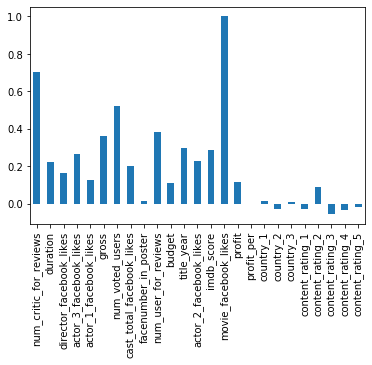

In [111]:

data_movie_facebook_likes.plot(kind='bar')

In [112]:
data_actor_1_facebook_likess =  data2['actor_1_facebook_likes']
data_actor_1_facebook_likess

num_critic_for_reviews       0.167219
duration                     0.085510
director_facebook_likes      0.091186
actor_3_facebook_likes       0.248670
actor_1_facebook_likes       1.000000
gross                        0.141816
num_voted_users              0.178861
cast_total_facebook_likes    0.946830
facenumber_in_poster         0.060125
num_user_for_reviews         0.125085
budget                       0.046175
title_year                   0.090720
actor_2_facebook_likes       0.386625
imdb_score                   0.094249
movie_facebook_likes         0.126551
profit                       0.042039
profit_per                  -0.015248
country_1                    0.073728
country_2                   -0.066792
country_3                   -0.028624
content_rating_1            -0.032666
content_rating_2             0.059910
content_rating_3            -0.015048
content_rating_4            -0.039681
content_rating_5            -0.010818
Name: actor_1_facebook_likes, dtype: float64

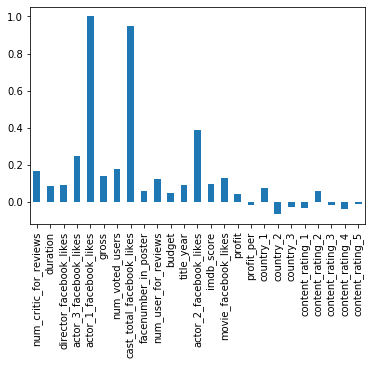

In [113]:
data_actor_1_facebook_likess.plot(kind='bar')

In [114]:
data_profit =  data2['profit']
data_profit

num_critic_for_reviews       0.120595
duration                     0.016230
director_facebook_likes      0.045631
actor_3_facebook_likes       0.083784
actor_1_facebook_likes       0.042039
gross                        0.392753
num_voted_users              0.242138
cast_total_facebook_likes    0.067877
facenumber_in_poster         0.005806
num_user_for_reviews         0.190623
budget                      -0.808595
title_year                  -0.050736
actor_2_facebook_likes       0.067949
imdb_score                   0.085720
movie_facebook_likes         0.115732
profit                       1.000000
profit_per                   0.025542
country_1                    0.139827
country_2                   -0.161411
country_3                   -0.013005
content_rating_1            -0.063002
content_rating_2             0.018147
content_rating_3             0.049230
content_rating_4             0.034803
content_rating_5            -0.001462
Name: profit, dtype: float64

In [115]:
data_gross  =  data2['gross']
data_gross

num_critic_for_reviews       0.462805
duration                     0.246260
director_facebook_likes      0.138764
actor_3_facebook_likes       0.279434
actor_1_facebook_likes       0.141816
gross                        1.000000
num_voted_users              0.627698
cast_total_facebook_likes    0.225964
facenumber_in_poster        -0.029203
num_user_for_reviews         0.548246
budget                       0.223509
title_year                   0.040638
actor_2_facebook_likes       0.239661
imdb_score                   0.218076
movie_facebook_likes         0.361983
profit                       0.392753
profit_per                   0.019277
country_1                    0.175792
country_2                   -0.154615
country_3                   -0.073763
content_rating_1            -0.281317
content_rating_2             0.167874
content_rating_3             0.143278
content_rating_4             0.076847
content_rating_5            -0.035450
Name: gross, dtype: float64

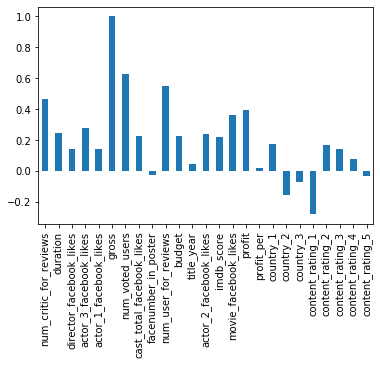

In [116]:
data_gross.plot(kind='bar')

In [117]:
data_title_year  =  data2['title_year']
data_title_year

num_critic_for_reviews       0.403130
duration                    -0.136415
director_facebook_likes     -0.048381
actor_3_facebook_likes       0.111624
actor_1_facebook_likes       0.090720
gross                        0.040638
num_voted_users              0.015468
cast_total_facebook_likes    0.120557
facenumber_in_poster         0.069050
num_user_for_reviews         0.012556
budget                       0.079773
title_year                   1.000000
actor_2_facebook_likes       0.118063
imdb_score                  -0.131679
movie_facebook_likes         0.294758
profit                      -0.050736
profit_per                  -0.012401
country_1                   -0.005027
country_2                    0.048649
country_3                   -0.050451
content_rating_1            -0.083103
content_rating_2             0.173761
content_rating_3            -0.065150
content_rating_4            -0.078143
content_rating_5            -0.090618
Name: title_year, dtype: float64

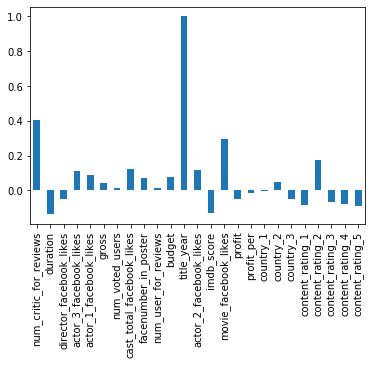

In [118]:
data_title_year.plot(kind='bar')

For some other variables:
- movie_facebook_likes correlated with:  num_critic_for_reviews, num_voted_users, num_user_for_reviews, gross 
- actor_1_facebook_likess:  cast_total_facebook_likes
- gross:  num_critic_for_reviews, num_voted_users, num_user_for_reviews, movie_facebook_likes
- data_title_year: num_critic_for_reviews

# Storytelling: 
## At the end, this is what your client is interested in. Develop useful insights from your analysis. Write a summery using bulleted lists and/or numbers in markdown cells.

### 1. The most important factor that affects the IMDb score is num_voted_users. 
- The num_voted_users have the highest correlation value with imdb score, which is 0.48. 
- The higher the value in num_voted_users, the higher the number received in imdb score.
- The movies' imdb score bigger than 8.5 has an Obviously more num_voted_users.

### 2. The second important factor that affects the IMDb score is num_critic_for_reviews. 
- The num_critic_for_reviews have a correlation value with imdb score is 0.35. 
- The higher the value in num_critic_for_reviews, the higher the number received in imdb score.
- num_critic_for_reviews highly correlated with the movie_facebook_likes.  More movie facebook likes will have more numbers of critic's reviews.  
- Also the movie title year also a factor to affects the  num_critic_for_reviews

### 3. The third important factor that affects the IMDb score is num_user_for_reviews. 
- The num_user_for_reviews have a correlation value with imdb score is 0.328. 
- The higher the value in num_user_for_reviews, the higher the number received in imdb score.

- num_user_for_reviews correlated with the movie_facebook_likes and gross.  

- num_user_for_reviews could know about the gross of a movie. Usually, a higher num_user_for_reviews movie could have a better gross. 

- num_user_for_reviews also have a positive relationship with the movie_facebook_likes, but this affection is lesser than num_critic_for_reviews. 

### 4. Those three important factors are highly correlated with each other.

- num_voted_users, num_critic_for_reviews, and num_user_for_reviews are  highly correlated with each other.

- The relationship between those three important factors is a positive relationship.

- A high imdb score movie usually will have high results of those three important factors.

- Those three factors could represents the popularity of a movie, so those also correlated movie facebook likes and gross. 

### 5. Another correlation factor: duration
- The factor duration has a 0.396 correlation number with the imdb score
- This means duration has a positive relationship with imdb score
- Longer duration could let more people watch the movie. Thus could increase the popularity of the movie and increase the number of users' votes and users' reviews. 
- For the data, we could guess that usually, a high imdb score movie has a longer duration.


### 6. profit
- profit only correlated with gross and budget, it almost nothing to do with imdb score.
- This means that a high imdb score may not have a good profit, such as the small mass films.
- However, profit still correlated with gross, and gross correlated with most movie popularity factors, such as movie likes or the number of users. 
- control of the budget is also a way of increasing profit at the same popularity level.

### 7. facebook likes
- actor's facebook likes only correlated to other actor's facebook likes of the same movie and total cast's facebook likes. 
- It only has a little bit of influence on the three important factors.
- director facebook likes' influence is lesser than actors' facebook likes.
- movie facebook likes have a little relationship with imdb score. It could show a movie's popularity degree and numbers of users like the movie. 
 

### 8. title year and country
- The USA made most of the movie in imdb, but the average score of American movies is not very good.
- Germany's movie has the highest imdb average score. 
- Country is not an important factor in a high imdb score movie.
- The old movie usually has a good imdb score, but its total movie number is not big. The reason may be the bad or boring movie may be forgotten by time.
- The longer title year could increase the number of critics' reviews. Thus, the movie could have a higher and higher imdb score over time. 

### 9. others
- the other factors such as content rating are doing nothing about imdb score.


## summary: 
Form the three important factors of the imdb score, we could get that the popularity is very important to the imdb score. However, a high imdb score is almost nothing to do with the profit. Rather, the popularity factors could affect the profit, such as movie likes or numbers of users. Also, a high budget movie may not have a good profit and imdb score.  Therefore, I think the ‘publicity’ could be another very important factor for both imdb score and profit. We should about relevant data and analytes it. 

reference section:

Yueming Zhang. "Project Report: IMDB 5000 Movie Dataset". content from: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

MIS 665 Dicussion. "Online Forum: Midterm Project". content from: https://k-state.instructure.com/courses/81006/discussion_topics/505217?module_item_id=1875123

<a id="cell1"></a>

# Final part

In [119]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

In [120]:
# showing the correlation for imdb score
data_score

num_critic_for_reviews       0.352909
duration                     0.369339
director_facebook_likes      0.195026
actor_3_facebook_likes       0.069904
actor_1_facebook_likes       0.094249
gross                        0.218076
num_voted_users              0.480849
cast_total_facebook_likes    0.107683
facenumber_in_poster        -0.068178
num_user_for_reviews         0.328116
budget                       0.048667
title_year                  -0.131679
actor_2_facebook_likes       0.102462
imdb_score                   1.000000
movie_facebook_likes         0.286216
profit                       0.085720
profit_per                   0.009009
country_1                   -0.135538
country_2                    0.076970
country_3                    0.107072
content_rating_1             0.167019
content_rating_2            -0.127397
content_rating_3            -0.066688
content_rating_4             0.007505
content_rating_5            -0.003022
Name: imdb_score, dtype: float64

In [121]:
#showing the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 32 columns):
director_name                3731 non-null object
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_2_name                 3731 non-null object
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
genres                       3731 non-null object
actor_1_name                 3731 non-null object
movie_title                  3731 non-null object
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
actor_3_name                 3731 non-null object
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 no

In [122]:
#drop the unimportant
data = data.drop(['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','allcountries','genres'],axis=1)

In [123]:
#drop the unimportant
data = data.drop(['country_1','country_2','country_3','content_rating_1','content_rating_2','content_rating_3','content_rating_4','content_rating_5'],axis=1)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 17 columns):
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 non-null float64
actor_2_facebook_likes       3731 non-null float64
imdb_score                   3731 non-null float64
movie_facebook_likes         3731 non-null int64
profit                       3731 non-null float64
profit_per                   3731 non-null float64
dtypes: float64(14), int64(3)
me

# Regression 

## a. Getting the Importances

In [125]:
#Using the RandomForestRegressor get importances For all the categories. 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
y = data['imdb_score'] 
X = data[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','budget','profit','actor_2_facebook_likes']]

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)




In [126]:
# Creating the dataframe of importances
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
num_voted_users,0.326711
duration,0.114762
budget,0.106252
num_user_for_reviews,0.068226
gross,0.061525
num_critic_for_reviews,0.051604
title_year,0.042431
actor_3_facebook_likes,0.036367
director_facebook_likes,0.034253
profit,0.031357


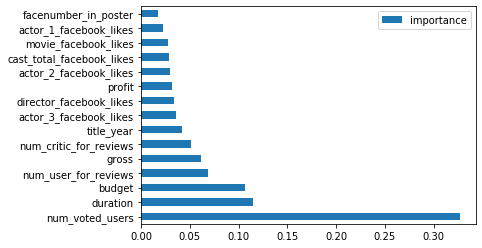

In [127]:
# Pringting pout the importances 
feature_importances.plot(kind='barh')

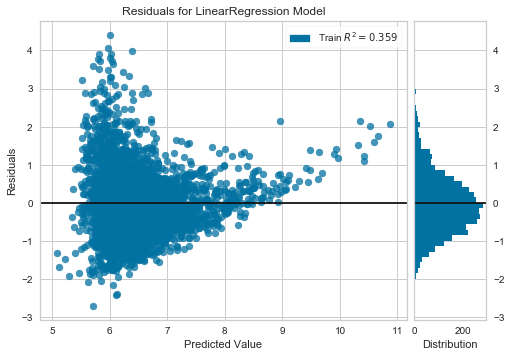

In [128]:
from yellowbrick.regressor import ResidualsPlot
import sklearn.linear_model as lm

regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()  

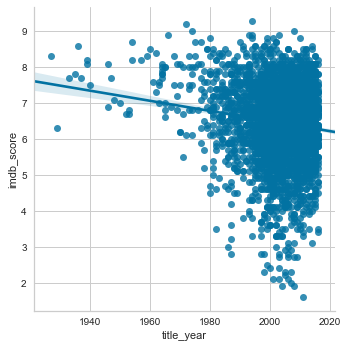

In [129]:
#showing the relationship for title year
sns.lmplot('title_year', 'imdb_score', data)

## b. Model Development: Regression (LinearRegression) and Model Evaluation

In [130]:
#Buding model1 with X, Y
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.58234626e-03  1.05171908e-02  3.09786739e-06  7.83651634e-05
  7.33573248e-05 -1.35263063e-09  3.69033174e-06 -7.22286516e-05
 -2.62461657e-02 -6.24477078e-04 -2.12446418e-02 -1.97880552e-06
 -7.74529106e-10 -5.66167021e-10  7.48036994e-05]
y-intercept  47.467766728329494


In [131]:
#showing the importance
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,num_critic_for_reviews,2.582346e-03
1,duration,1.051719e-02
2,director_facebook_likes,3.097867e-06
3,actor_3_facebook_likes,7.836516e-05
4,actor_1_facebook_likes,7.335732e-05
5,gross,-1.352631e-09
6,num_voted_users,3.690332e-06
7,cast_total_facebook_likes,-7.222865e-05
8,facenumber_in_poster,-2.624617e-02
9,num_user_for_reviews,-6.244771e-04


In [132]:
#showing the accuracy  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7182595986304885
variance or r-squared:  0.35929825196771736


In [133]:
# Building the model2 with new X, y (High importances)
y2 = data['imdb_score'] 
X2 = data[['num_voted_users','duration','gross']]

model2 =  lm.LinearRegression()            #higher alpha (penality parameter), fewer predictors
model2.fit(X2, y2)
model2_y = model2.predict(X2)



In [134]:
#showing the accuracy  
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [ 3.45601039e-06  1.11027023e-02 -2.31050100e-09]
y-intercept  4.9987689648341345


In [135]:
#showing the accuracy  
print("mean square error: ", mean_squared_error(y2, model2_y))
print("variance or r-squared: ", explained_variance_score(y2, model2_y))

mean square error:  0.7932386834255686
variance or r-squared:  0.2924154274490257


In [136]:
# Building the model3 with new X, y (correlation >0.3 or <-0.3)
y3 = data['imdb_score'] 
X3 = data[['num_voted_users','duration','num_critic_for_reviews','num_user_for_reviews']]

model3 =  lm.LinearRegression()            #higher alpha (penality parameter), fewer predictors
model3.fit(X3, y3)
model3_y = model3.predict(X3)



In [137]:
#showing the accuracy  
print('Coefficients: ', model3.coef_)
print("y-intercept ", model3.intercept_)

Coefficients:  [ 3.42201138e-06  1.15654828e-02  1.06736164e-03 -5.55976630e-04]
y-intercept  4.841109219364918


In [138]:
#showing the accuracy  
print("mean square error: ", mean_squared_error(y3, model3_y))
print("variance or r-squared: ", explained_variance_score(y3, model3_y))

mean square error:  0.7841657012571048
variance or r-squared:  0.3005087067400847


### Coefficents are found by minimizing the error of prediction
### The goal of regression model is to minimize Sum of Squared Error (SSE)
### Sum of Squared Error ( 𝑆𝑆𝐸): Sum of squared residuals or errors. Mean Squared Error ( 𝑀𝑆𝐸 )= 𝑆𝑆𝐸/𝑛 (where n is the number of samples)
### R-square or coefficient of determination): A high  𝑅−𝑠𝑞𝑢𝑎𝑟𝑒 means that the regression model fits well with the dataset
#### Therefore, for those three models, the first model (with all variables) has the smallest the mse and highest the r^2. Even it is a complex model, I still think that is the best model for this dataset

## c.Different regression algorithm

In [139]:
# Multiple Regression using Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
runs_reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+num_user_for_reviews+title_year+movie_facebook_likes+budget+profit+actor_2_facebook_likes",data)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     148.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:02:12   Log-Likelihood:                -4676.7
No. Observations:                3731   AIC:                             9383.
Df Residuals:                    3716   BIC:                             9477.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [140]:
runs_reg.mse_resid

0.7211589242439113

In [141]:
#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
y = data['imdb_score'] 
X = data[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','budget','profit','actor_2_facebook_likes']]
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
fre = lm.LinearRegression()
fre.fit(X_new, y)
fre_y = fre.predict(X_new)

print("mean square error: ", mean_squared_error(y, fre_y))
print("variance or r-squared: ", explained_variance_score(y, fre_y))


mean square error:  0.8086012249031822
variance or r-squared:  0.2787117370316713


In [142]:
# RandormForestRegressor for Feature Selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


y = data['imdb_score'] 
X = data[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','budget','profit','actor_2_facebook_likes']]



regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.0719703184132941
variance or r-squared:  0.9358316646602232


#### We use the best model (selected from part b), in the different regression algorithms. The result We also got a low mse (great) with a low r^2 (bad). However,  RandormForestRegressor gives a very low mse value and a high r^2 value, so RandormForestRegressor is the best regression algorithms for this dataset. 

## d. (Optional for extra points) scoring dataset

In [143]:
#reading the score data
scoring = pd.read_csv("data/scoring_movie.csv")
scoring = scoring.drop(['Unnamed: 0'],axis=1)

In [144]:
#precidt the data
columns = scoring[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','budget','profit','actor_2_facebook_likes']]
model1.predict(columns)

array([6.95281939, 6.70374517, 7.60413316, ..., 6.25216955, 5.74683219,
       5.91094281])

In [145]:
#use RandomForestRegressor to predict the better resuelt.
regr.predict(columns)

array([7.516, 6.222, 7.386, ..., 7.014, 6.147, 6.61 ])

# Classification

## a. Creating new dataframe and imdb socre lable columne.

In [146]:
# saving the data now, the next several steps will change the data. we need to use data in the clustering
data.to_csv("data/data.csv")

In [147]:
data_dtc=data

In [148]:
data_dtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 17 columns):
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 non-null float64
actor_2_facebook_likes       3731 non-null float64
imdb_score                   3731 non-null float64
movie_facebook_likes         3731 non-null int64
profit                       3731 non-null float64
profit_per                   3731 non-null float64
dtypes: float64(14), int64(3)
me

In [149]:
#create imdb_score_lable, “less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively”
data_dtc['imdb_score_lable'] = pd.cut(data_dtc['imdb_score'],bins=[0,4,6,8,10],labels=['bad','ok','good','excellent'],
                                     include_lowest=True)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 non-null float64
actor_2_facebook_likes       3731 non-null float64
imdb_score                   3731 non-null float64
movie_facebook_likes         3731 non-null int64
profit                       3731 non-null float64
profit_per                   3731 non-null float64
imdb_score_lable             373

In [151]:
#drop the imdb_score. (too simialer categroy with imdb_score_lable)
data_dtc = data_dtc.drop(['imdb_score'],axis=1)

In [152]:
# Create x and y for imdb_score_lable 
y = data_dtc['imdb_score_lable']
X = data_dtc.drop(['imdb_score_lable'], axis=1)

## b. Decision tree

In [153]:
# split validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Initialize DecisionTreeClassifier() ... name your decision model "dt"

dt=DecisionTreeClassifier()
# Train a decision tree model
dt.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [154]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6455357142857143
--------------------------------------------------------
[[  2   1   5  21]
 [  0  27  19   0]
 [ 17  25 539 135]
 [ 11   0 163 155]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.07      0.07      0.07        29
   excellent       0.51      0.59      0.55        46
        good       0.74      0.75      0.75       716
          ok       0.50      0.47      0.48       329

    accuracy                           0.65      1120
   macro avg       0.45      0.47      0.46      1120
weighted avg       0.64      0.65      0.64      1120

--------------------------------------------------------


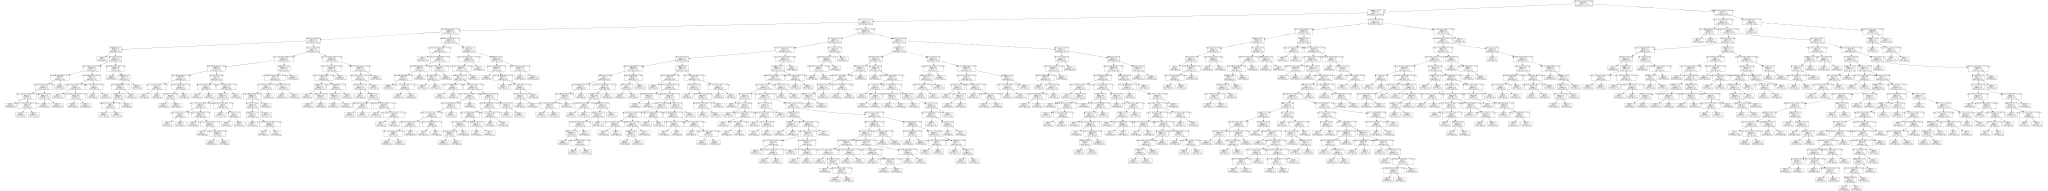

In [155]:
#draw decision tree graph
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))
# this is huge graph, starting with num_voted_users.

In [156]:
dt = DecisionTreeClassifier()    # develop a very complex ("full-grown") tree
# You can make a simpler decision tree ... name the model "dt_simple" (max_depth=3, min_samples_leaf=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
data_simple = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5)
data_simple.fit(X_train,y_train)
# max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_leaf : The minimum number of samples required to be at a leaf node
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
#simple tree evaluation
print(metrics.accuracy_score(y_test, data_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, data_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, data_simple.predict(X_test)))
print("--------------------------------------------------------")


0.6991071428571428
--------------------------------------------------------
[[  0   0  12  17]
 [  0  23  23   0]
 [  0  10 600 106]
 [  0   0 169 160]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
   excellent       0.70      0.50      0.58        46
        good       0.75      0.84      0.79       716
          ok       0.57      0.49      0.52       329

    accuracy                           0.70      1120
   macro avg       0.50      0.46      0.47      1120
weighted avg       0.67      0.70      0.68      1120

--------------------------------------------------------


/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


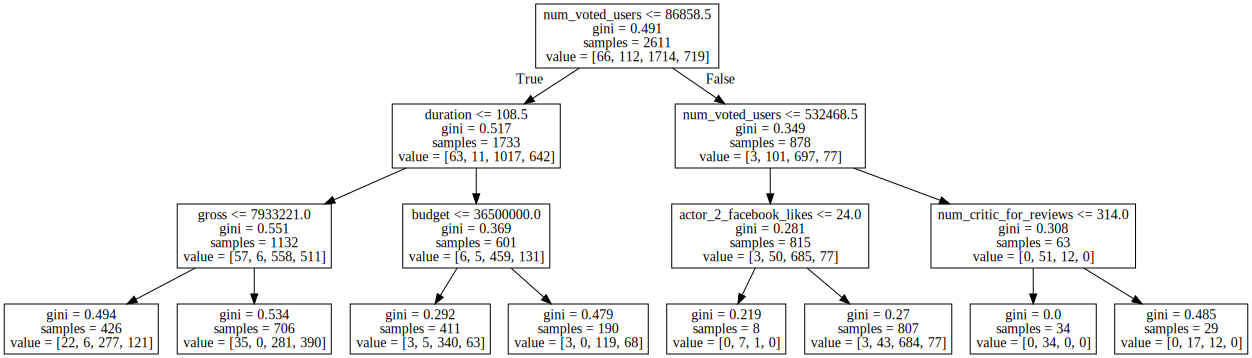

In [158]:
#draw simple decision tree graph
from graphviz import Source
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(data_simple, out_file=None, feature_names=X.columns))


### We can see the regular DecisionTreeClassifier() will create a very complex tree, so use simple tree can simplify the function with choosing the depth and leaves by yourself. The accuracy also is higher for the simple tree, but it still not good enough.

## c. Knn

In [159]:
# build knn model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [160]:
#simple tree evaluation
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.5839285714285715
--------------------------------------------------------
[[  0   0  22   7]
 [  0   1  42   3]
 [  7  10 581 118]
 [  0   1 256  72]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
   excellent       0.08      0.02      0.03        46
        good       0.64      0.81      0.72       716
          ok       0.36      0.22      0.27       329

    accuracy                           0.58      1120
   macro avg       0.27      0.26      0.26      1120
weighted avg       0.52      0.58      0.54      1120

--------------------------------------------------------


### Knn take the biggest value in all the k space, this gives an accuracy with 0.583, it is not as good as DecisionTreeClassifier

## d. Logistic regression

In [161]:
#build the logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

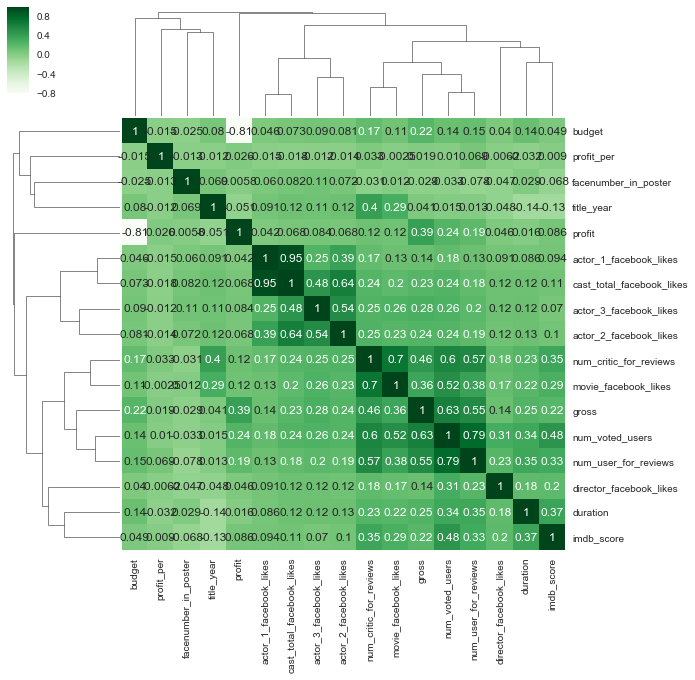

In [162]:
#showing the correlation 
sns.clustermap(data=data.corr(), annot=True, cmap='Greens')

In [163]:
#logistic regression evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))


0.6589285714285714
[[  0   0  29   0]
 [  0  20  26   0]
 [  0   0 709   7]
 [  0   0 320   9]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
   excellent       1.00      0.43      0.61        46
        good       0.65      0.99      0.79       716
          ok       0.56      0.03      0.05       329

    accuracy                           0.66      1120
   macro avg       0.55      0.36      0.36      1120
weighted avg       0.62      0.66      0.54      1120



/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Unlike linear regression, logistic regression is for classification y value is categorical, this gives an accuracy with 0.658. It is better than the DecisionTreeClassifier model, but simple DecisionTreeClassifier is better than Logistic regression for this dataset.

## e. Random Forest Classifier 

In [164]:
from sklearn.ensemble import RandomForestClassifier
# build the random forest model

clf = RandomForestClassifier(n_estimators=70)    #building 70 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.75

In [165]:
#random forest evaluation
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.75
[[  0   0  10  19]
 [  0  26  20   0]
 [  0   1 657  58]
 [  0   0 172 157]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
   excellent       0.96      0.57      0.71        46
        good       0.76      0.92      0.83       716
          ok       0.67      0.48      0.56       329

    accuracy                           0.75      1120
   macro avg       0.60      0.49      0.53      1120
weighted avg       0.73      0.75      0.73      1120



/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### The Random Forest Classifier is also the best algorithm for the classification. This gives an accuracy around 0.75. However, the random forest only takes 70 decision trees every time (around 70 is Most efficient), so its accuracy will change every time we run it.


## f. SelectKBest

In [166]:
# Because the select-best does not allow the negative value, so we can not have the 'profit' in the X 
X = data_dtc[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','budget','actor_2_facebook_likes']]
#X = data_dtc[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','actor_2_facebook_likes']]


X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 5  6 12]


In [167]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,movie_facebook_likes,budget,actor_2_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,2009.0,33000,237000000.0,936.0


In [168]:
print(X_new)

[[7.60505847e+08 8.86204000e+05 2.37000000e+08]
 [3.09404152e+08 4.71220000e+05 3.00000000e+08]
 [2.00074175e+08 2.75868000e+05 2.45000000e+08]
 ...
 [2.04092000e+06 5.20550000e+04 7.00000000e+03]
 [4.58400000e+03 1.33800000e+03 9.00000000e+03]
 [8.52220000e+04 4.28500000e+03 1.10000000e+03]]


- 5 --> 5st column (gross)
- 6 --> 6rd column (num_voted_users)
- 12 --> 12th column (budget)

In [169]:

# Build a decision tree model with those three features ... Split validation:train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

# Initialize decisiontreeclassifier()

dt=DecisionTreeClassifier()
# Train the model

dt.fit(X_train,y_train)

#Model evaluation

print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6366071428571428
--------------------------------------------------------
[[  2   0  19   8]
 [  0  24  21   1]
 [ 16  12 542 146]
 [ 11   1 172 145]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.07      0.07      0.07        29
   excellent       0.65      0.52      0.58        46
        good       0.72      0.76      0.74       716
          ok       0.48      0.44      0.46       329

    accuracy                           0.64      1120
   macro avg       0.48      0.45      0.46      1120
weighted avg       0.63      0.64      0.63      1120

--------------------------------------------------------


In [170]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print(metrics.classification_report(y_test, lr.predict(X_test)))

/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6151785714285715
[[  0   0  29   0]
 [  0  11  35   0]
 [  0  41 670   5]
 [  0   3 318   8]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
   excellent       0.20      0.24      0.22        46
        good       0.64      0.94      0.76       716
          ok       0.62      0.02      0.05       329

    accuracy                           0.62      1120
   macro avg       0.36      0.30      0.26      1120
weighted avg       0.60      0.62      0.51      1120



### This select the 5 --> 5st column (gross), 6 --> 6rd column (num_voted_users), 12 --> 12th column (budget). But it does not a very good accuracy 

## g. Recursive Feature Selection (RFE)

In [171]:
model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linea

[ True  True False False False False False False  True  True  True False
 False False]
[ 1  1  6  3  4  9  8  5  1  1  1  7 10  2]


/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [172]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,num_critic_for_reviews,1
1,duration,1
2,director_facebook_likes,6
3,actor_3_facebook_likes,3
4,actor_1_facebook_likes,4
5,gross,9
6,num_voted_users,8
7,cast_total_facebook_likes,5
8,facenumber_in_poster,1
9,num_user_for_reviews,1


In [173]:
#creat the x_logistic, based on selected column.
X_logistic = data_dtc[['num_critic_for_reviews', 'duration', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year']]
print(X_logistic.head())

   num_critic_for_reviews  duration  facenumber_in_poster  num_user_for_reviews  title_year
0                   723.0     178.0                   0.0                3054.0      2009.0
1                   302.0     169.0                   0.0                1238.0      2007.0
2                   602.0     148.0                   1.0                 994.0      2015.0
3                   813.0     164.0                   0.0                2701.0      2012.0
5                   462.0     132.0                   1.0                 738.0      2012.0


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6446428571428572
[[  0   0  24   5]
 [  0   2  44   0]
 [  0   6 681  29]
 [  0   0 290  39]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
   excellent       0.25      0.04      0.07        46
        good       0.66      0.95      0.78       716
          ok       0.53      0.12      0.19       329

    accuracy                           0.64      1120
   macro avg       0.36      0.28      0.26      1120
weighted avg       0.59      0.64      0.56      1120



/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### The Recursive Feature Selection (RFE) we select the 5 best modle, which is 'num_critic_for_reviews', 'duration', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year', and give us a accuracy at 0.644

## h. (Optional for extra points) Deploy your best classification model and predict if each movie (in the scoring dataset) is bad, OK, good or excellent.

In [175]:
scoring.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,profit_per
0,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,29000,-59192738.0,77.233562
1,434.0,169.0,0.0,903.0,18000.0,200069408.0,240396,29991,0.0,2367.0,209000000.0,2006.0,10000.0,0,-8930592.0,95.726989


In [176]:
# build the model for predicting
y = data_dtc['imdb_score_lable']
X = data_dtc.drop(['imdb_score_lable'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
data_dtc.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,profit_per,imdb_score_lable
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,320.888543,good
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0,103.134717,good


In [177]:
#predicting the data
dt=dt.fit(X_train,y_train)
predictedY = dt.predict(scoring)
print(predictedY)

['good' 'good' 'good' ... 'good' 'good' 'good']


In [178]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head()

,predicted Y
0,good
1,good
2,good
3,good
4,good


In [179]:
#join the predicting column to dataset.
after = scoring.join(predictedY) 
after.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,profit_per,predicted Y
0,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,29000,-59192738.0,77.233562,good
1,434.0,169.0,0.0,903.0,18000.0,200069408.0,240396,29991,0.0,2367.0,209000000.0,2006.0,10000.0,0,-8930592.0,95.726989,good
2,733.0,143.0,0.0,748.0,15000.0,291021565.0,548573,20495,0.0,2536.0,225000000.0,2013.0,3000.0,118000,66021565.0,129.342918,good
3,451.0,106.0,188.0,718.0,10000.0,179020854.0,268154,12572,1.0,341.0,225000000.0,2012.0,816.0,40000,-45979146.0,79.564824,good
4,509.0,186.0,0.0,773.0,5000.0,258355354.0,483540,9152,6.0,951.0,225000000.0,2013.0,972.0,83000,33355354.0,114.824602,good


# Clustering

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3731 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 non-null float64
actor_2_facebook_likes       3731 non-null float64
imdb_score                   3731 non-null float64
movie_facebook_likes         3731 non-null int64
profit                       3731 non-null float64
profit_per                   3731 non-null float64
imdb_score_lable             373

In [181]:
# read the data again, which is well cleaned before. 
df = pd.read_csv("data/data.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,320.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,103.134717
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,81.662929
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,179.252257
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,27.705225


In [182]:
# normalization the data
X = (df - df.mean()) / (df.max() - df.min())

In [183]:
X.var()

num_critic_for_reviews       0.022803
duration                     0.005967
director_facebook_likes      0.017707
actor_3_facebook_likes       0.006353
actor_1_facebook_likes       0.000588
gross                        0.008228
num_voted_users              0.008028
cast_total_facebook_likes    0.000837
facenumber_in_poster         0.002273
num_user_for_reviews         0.006389
budget                       0.000659
title_year                   0.012306
actor_2_facebook_likes       0.001068
imdb_score                   0.018913
movie_facebook_likes         0.003733
profit                       0.000585
profit_per                   0.000338
dtype: float64

profit = gross - budget, profit_per in percentage of the porfit

## K-means algorithm

In [184]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [185]:
#creat the k-mean with 4 cluster 
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [186]:
# fit the data
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [187]:
#clustering results
k_means.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [188]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 1.47546894e+02,  1.08415347e+02,  6.86392509e+02,
         6.10440926e+02,  7.07634470e+03,  3.11389168e+07,
         7.45772482e+04,  1.02135009e+04,  1.41227877e+00,
         2.64368453e+02,  3.05545706e+07,  2.00297838e+03,
         1.68140743e+03,  6.37588307e+00,  6.90008952e+03,
         5.84346125e+05,  3.50705670e+02],
       [ 1.38500000e+02,  1.20750000e+02,  1.53075000e+03,
         2.21000000e+02,  5.26750000e+02,  7.79033500e+05,
         7.35975000e+04,  1.15475000e+03,  2.50000000e-01,
         2.06250000e+02,  2.80687997e+09,  2.00275000e+03,
         3.28750000e+02,  7.52500000e+00,  4.14500000e+03,
        -2.80610094e+09,  3.19806678e-02],
       [ 2.75730594e+02,  1.20890411e+02,  1.63334018e+03,
         1.76295205e+03,  1.14940548e+04,  2.00479146e+08,
         3.15918699e+05,  1.91652534e+04,  1.18352671e+00,
         7.85262557e+02,  9.17807988e+07,  2.00331507e+03,
         4.04187900e+03,  7.05022831e+00,  2.51238105e+04,
         1.08698347e+08,  2.6

In [189]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,2
2,2
3,2
4,0


In [190]:
# reset the index for df
df = df.reset_index(drop=True)

In [191]:
# reset the index for df1
df1 = df1.reset_index(drop=True)

In [192]:
# created the dataset for df and df1
df2 = df.join(df1)

In [193]:
df2.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per,cluster
3726,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,19000,417760.0,6068.000000,0
3727,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,7000.0,2005.0,0.0,6.3,74,63071.0,1001.014286,0
3728,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,0,2033920.0,29156.000000,0
3729,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,9000.0,2011.0,205.0,6.4,413,-4416.0,50.933333,0
3730,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,2004.0,23.0,6.6,456,84122.0,7747.454545,0


In [194]:
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,320.888543,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,103.134717,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,81.662929,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,179.252257,2
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,27.705225,0


In [195]:
# showing the clustering samples number
df2.groupby('cluster').size()

cluster
0    3283
1       4
2     439
3       5
dtype: int64

In [196]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3.731000e+03,3.731000e+03,3731.000000,3731.000000,3731.000000,3.731000e+03,3731.000000,3731.000000,3731.000000,3731.000000,3.731000e+03,3731.000000
mean,162.514071,109.930314,797.798713,744.865720,7580.906995,5.094861e+07,1.028527e+05,11244.594747,1.384698,325.364514,4.176423e+07,2003.013401,1955.260520,6.457036,9027.670866,9.184374e+06,624.855745
std,122.617903,22.632984,3060.594061,1833.166621,15525.128762,6.898431e+07,1.513994e+05,18999.947608,2.050026,404.384003,1.078257e+08,9.873154,4476.779345,1.058939,21324.466988,1.142811e+08,13218.767479
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,0.000000,-4.199788e+09,0.001800
25%,73.000000,95.000000,10.000000,187.500000,726.500000,7.156829e+06,1.765900e+04,1852.000000,0.000000,103.000000,1.000000e+07,1999.000000,368.000000,5.900000,0.000000,-1.020737e+07,46.502910
50%,134.000000,106.000000,58.000000,430.000000,1000.000000,2.804554e+07,5.065300e+04,3921.000000,1.000000,202.000000,2.400000e+07,2005.000000,664.000000,6.600000,204.000000,1.081498e+06,108.334422
75%,219.000000,120.000000,224.000000,686.000000,12000.000000,6.554653e+07,1.237490e+05,15939.500000,2.000000,388.500000,5.000000e+07,2010.000000,971.000000,7.200000,11000.000000,2.475147e+07,223.472177
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.300000,349000.000000,5.235058e+08,719448.553333


In [197]:
#showing the mean of each cluster
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profit_per
cluster,,,,,,,,,,,,,,,,,
0,147.559549,108.412123,682.946390,610.431008,7074.844959,3.111498e+07,74581.194639,10211.906183,1.411186,264.382272,3.055626e+07,2002.983552,1681.717332,6.375602,6902.191288,5.587205e+05,350.678820
1,138.500000,120.750000,1530.750000,221.000000,526.750000,7.790335e+05,73597.500000,1154.750000,0.250000,206.250000,2.806880e+09,2002.750000,328.750000,7.525000,4145.000000,-2.806101e+09,0.031981
2,275.343964,120.886105,1656.954442,1760.400911,11495.207289,2.002724e+08,315339.432802,19156.788155,1.192220,783.972665,9.162868e+07,2003.275626,4034.184510,7.050797,25066.580866,1.086437e+08,2688.055177
3,94.400000,136.200000,189.600000,269.800000,1829.000000,3.213223e+06,32981.200000,2689.200000,1.800000,195.800000,8.107264e+08,1999.800000,335.400000,6.940000,307.400000,-8.075132e+08,0.373169


cluster0: medium num_critic_for_reviews | medium low duration | medium director_facebook_likes | medium actor_3_facebook_likes | medium actor_1_facebook_likes | medium gross |  relatively low num_voted_users | medium cast_total_facebook_likes | meiudm facenumber_in_poster | medium num_user_for_reviews | meidum budget | medium title_year | medium actor_2_facebook_likes | low imdb_score | medium movie_facebook_likes | relatively low profit | low profit_per

cluster1: relatively low num_critic_for_reviews | relatively high duration | very high director_facebook_likes | very low actor_3_facebook_likes | very low actor_1_facebook_likes | very low gross | relatively low num_voted_users | very low cast_total_facebook_likes | very low facenumber_in_poster | relatively low num_user_for_reviews | relatively low budget | medium title_year | very low actor_2_facebook_likes | high imdb_score | relatively low movie_facebook_likes | very low profit | very low profit_per

cluster2: very high num_critic_for_reviews |  relatively high duration | very high director_facebook_likes | very high actor_3_facebook_likes | very high actor_1_facebook_likes |  very high gross | very high num_voted_users | high cast_total_facebook_likes | relatively low facenumber_in_poster | very high num_user_for_reviews | high budget | relatively high title_year | very high actor_2_facebook_likes | relatively high imdb_score | very high movie_facebook_likes | very high profit | very high profit_per

cluster3: very low num_critic_for_reviews | high duration | very low director_facebook_likes | very low actor_3_facebook_likes | relatively low actor_1_facebook_likes | relatively low gross | very low num_voted_users | relatively low cast_total_facebook_likes | high facenumber_in_poster | very low num_user_for_reviews | low budget | relatively low title_year | very low actor_2_facebook_likes | medium imdb_score | very low movie_facebook_likes | very low profit | very low profit_per 

## Build Decision Tree model

In [198]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [199]:
#creating the new Y and x
y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)

In [200]:
# build the model again
model=DecisionTreeClassifier()
model=model.fit(X,y)

In [201]:
from sklearn.externals.six import StringIO
# creating the decision tree graph 
#!pip install pydotplus
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

/Users/gouyeye/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True

In [202]:
#import the decision tree graph
from IPython.display import IFrame
IFrame('data/dt.pdf', width=1000, height=500)

For in rare cluster 2 and cluster 4, it needs be gross <= 114259852 and profit <= - 476275472. If the budget is <= 1613759936 then it in cluster 4, otherwise it is in cluster 2

### We see that the only condition for cluster 2 and cluster 4 is profit, which is added by us. Therefore, delete the profit and simply do the clustering again.

In [203]:
# drop the two column that add by us. 
df = df.drop(['profit','profit_per'],axis=1)

In [204]:
# build the model and run it again
X2 = (df - df.mean()) / (df.max() - df.min())
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(df)
#To add cluster label into the dataset as a column
df3 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df = df.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
df4 = df.join(df3)
df4.groupby('cluster').size()

cluster
0    2719
1       4
2     826
3     182
dtype: int64

In [205]:
df4.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0,135.937845,106.814638,585.394998,523.771239,6193.545053,2.090830e+07,61262.885620,8895.802501,1.422129,231.242001,2.111334e+07,2002.673409,1396.986392,6.361199,5786.233910
1,138.500000,120.750000,1530.750000,221.000000,526.750000,7.790335e+05,73597.500000,1154.750000,0.250000,206.250000,2.806880e+09,2002.750000,328.750000,7.525000,4145.000000
2,207.077482,116.314770,1243.478208,1068.481840,10910.083535,1.016040e+08,172193.866828,16173.381356,1.300429,470.236077,7.034533e+07,2003.311138,2980.147700,6.594915,13559.749395
3,357.829670,127.263736,1932.208791,2590.714286,13353.181319,2.709427e+08,410126.697802,24187.164835,1.232883,1076.637363,1.597936e+08,2006.747253,5679.967033,7.239560,36991.961538


In [206]:
#build the anohter decision tree graph
y = df4['cluster'].values
X = df4.drop(['cluster'], axis=1)
model=DecisionTreeClassifier()
model=model.fit(X,y)
dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt2.pdf")

True

## Hierarchical clustering algorithm

Because the profit and profit_per are the important variables for clustering, but those are added by us. So for the Hierarchical, we will do the clustering without those variables.

In [207]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 15 columns):
num_critic_for_reviews       3731 non-null float64
duration                     3731 non-null float64
director_facebook_likes      3731 non-null float64
actor_3_facebook_likes       3731 non-null float64
actor_1_facebook_likes       3731 non-null float64
gross                        3731 non-null float64
num_voted_users              3731 non-null int64
cast_total_facebook_likes    3731 non-null int64
facenumber_in_poster         3731 non-null float64
num_user_for_reviews         3731 non-null float64
budget                       3731 non-null float64
title_year                   3731 non-null float64
actor_2_facebook_likes       3731 non-null float64
imdb_score                   3731 non-null float64
movie_facebook_likes         3731 non-null int64
dtypes: float64(12), int64(3)
memory usage: 437.3 KB


In [209]:
#normalization the data for hierarchical 
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0.690254,0.232320,-0.034687,0.004788,-0.010283,0.933007,0.463592,-0.009761,-0.032202,0.539363,0.046485,0.067265,-0.007440,0.187398,0.068689
1,0.171781,0.201603,-0.010209,0.011093,0.050655,0.339847,0.218002,0.056500,-0.032202,0.180398,0.061485,0.044793,0.022224,0.083502,-0.025867
2,0.541239,0.129931,-0.034687,-0.025385,0.005342,0.196087,0.102392,0.000693,-0.008946,0.132168,0.048389,0.134681,-0.011403,0.044541,0.217686
3,0.801091,0.184538,0.921835,0.967615,0.030342,0.522260,0.616357,0.145439,-0.032202,0.469586,0.049580,0.100973,0.153611,0.265320,0.444047
4,0.368825,0.075323,-0.014035,-0.009342,-0.010845,0.029073,0.064715,-0.014270,-0.008946,0.081565,0.052842,0.100973,-0.009659,0.018567,0.042901


In [210]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [211]:
plt.figure(figsize=(160,80))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

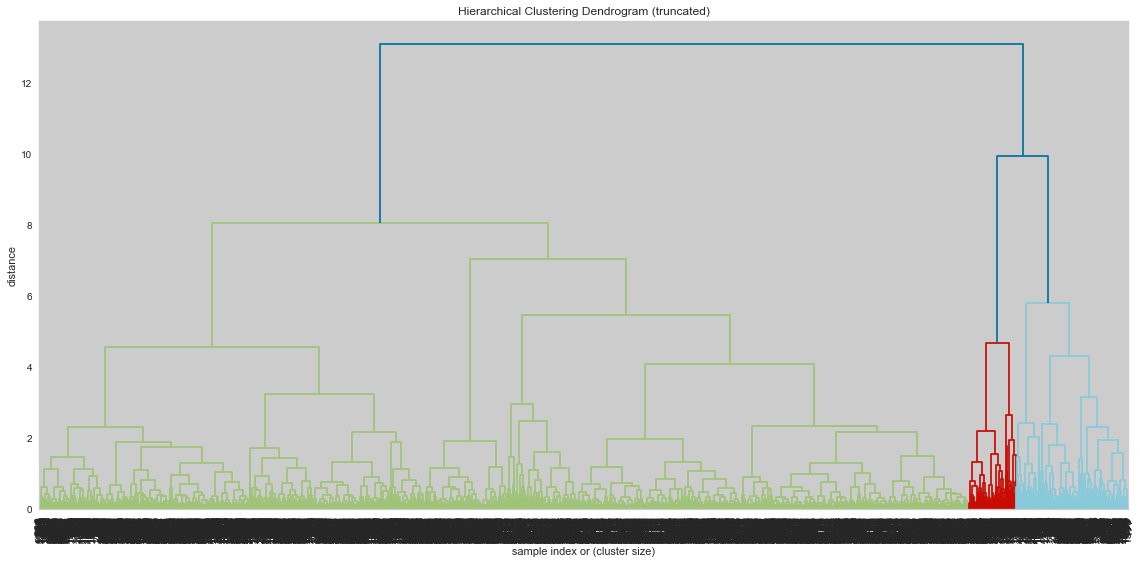

In [212]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

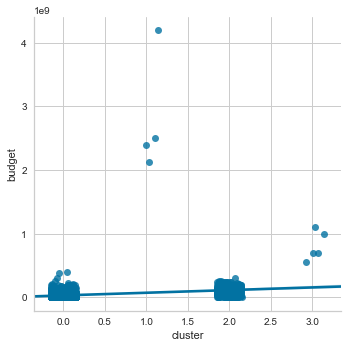

In [213]:
# showing the relationship for cluster and budget
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

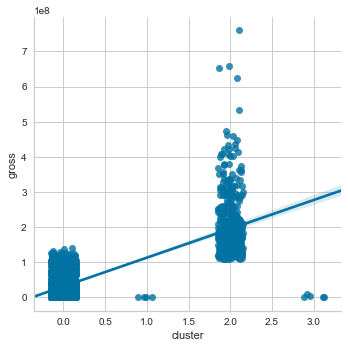

In [214]:
#showing the relationship for cluster and gross
sns.lmplot("cluster", "gross", df2, x_jitter=.15, y_jitter=.15)

In [215]:
#creating the df1
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,2
4,3


In [216]:
#creating the df2 by join df and df1
df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,2
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,3


In [217]:
#showing the samples number in each cluster
df2.groupby('cluster').size()

cluster
0    1866
1     384
2     161
3    1320
dtype: int64

In [218]:
#get the df informaiton 
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3.731000e+03,3.731000e+03,3731.000000,3731.000000,3731.000000,3.731000e+03,3731.000000,3731.000000,3731.000000,3731.000000
mean,162.514071,109.930314,797.798713,744.865720,7580.906995,5.094861e+07,1.028527e+05,11244.594747,1.384698,325.364514,4.176423e+07,2003.013401,1955.260520,6.457036,9027.670866
std,122.617903,22.632984,3060.594061,1833.166621,15525.128762,6.898431e+07,1.513994e+05,18999.947608,2.050026,404.384003,1.078257e+08,9.873154,4476.779345,1.058939,21324.466988
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,0.000000
25%,73.000000,95.000000,10.000000,187.500000,726.500000,7.156829e+06,1.765900e+04,1852.000000,0.000000,103.000000,1.000000e+07,1999.000000,368.000000,5.900000,0.000000
50%,134.000000,106.000000,58.000000,430.000000,1000.000000,2.804554e+07,5.065300e+04,3921.000000,1.000000,202.000000,2.400000e+07,2005.000000,664.000000,6.600000,204.000000
75%,219.000000,120.000000,224.000000,686.000000,12000.000000,6.554653e+07,1.237490e+05,15939.500000,2.000000,388.500000,5.000000e+07,2010.000000,971.000000,7.200000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.300000,349000.000000


In [219]:
# geting the cluster infomation
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0,81.449089,106.497856,128.454984,399.414791,4536.139335,2.655515e+07,38123.579850,6771.219185,1.314247,164.910504,2.446645e+07,1998.895498,1067.613612,6.198124,1355.099678
1,351.140625,123.882812,249.992188,2782.075521,14966.664062,1.506468e+08,360747.760417,25433.609375,1.222356,942.799479,8.100309e+07,2006.585938,5720.151042,7.416667,37873.536458
2,245.900621,126.018634,14757.763975,1525.024845,13610.577640,8.965795e+07,280870.130435,20451.031056,0.987578,674.440994,5.234601e+07,2000.248447,3904.577640,7.292547,21575.285714
3,212.066667,108.761364,200.676515,545.409091,9001.080303,5.170761e+07,97619.346970,12317.701515,1.579954,329.993939,5.351141e+07,2008.132576,1877.071970,6.441970,9951.943182


cluster0: very low num_critic_for_reviews | medium low duration | very low director_facebook_likes | low actor_3_facebook_likes | low actor_1_facebook_likes | low gross | very low num_voted_users | low cast_total_facebook_likes | meiudm facenumber_in_poster | very low num_user_for_reviews | low budget | low title_year | low actor_2_facebook_likes | relatively low imdb_score | very low movie_facebook_likes | 

cluster1: very high num_critic_for_reviews | relatively high duration | very low director_facebook_likes | very high actor_3_facebook_likes | very high actor_1_facebook_likes | very high gross | very high num_voted_users | very high cast_total_facebook_likes | relativelu low facenumber_in_poster | very high num_user_for_reviews | high budget | relatively low title_year | very high actor_2_facebook_likes | high imdb_score | very high low movie_facebook_likes | 

cluster2: relatively high num_critic_for_reviews | high duration | very high director_facebook_likes | high actor_3_facebook_likes | very high actor_1_facebook_likes | relativelu high gross | very high num_voted_users | high cast_total_facebook_likes | low facenumber_in_poster |  high num_user_for_reviews | medium budget | high title_year | high actor_2_facebook_likes | relatively high imdb_score | very high movie_facebook_likes |

cluster3: medium num_critic_for_reviews | relatively high duration | very low director_facebook_likes | relatively low actor_3_facebook_likes |  medium actor_1_facebook_likes | medium gross | medium num_voted_users | medium  cast_total_facebook_likes | relatively high facenumber_in_poster | meidum num_user_for_reviews | medium budget | very high title_year | medium actor_2_facebook_likes | medium imdb_score | medium movie_facebook_likes |

# Storytelling

### 1. From the regression, the first importance of the imdb_score is num_voted_users 
- the num_voted_users has an importance of the imdb_score at 0.3267, this is twice higher than second importance of the imdb_socre 

### 2. From the regression, the second importance of the imdb_score is the duration 
- the duration has the importance of the imdb_score at 0.1147. 

### 3. From the regression, the third importance of the imdb_score is budget 
- the budget has the importance of the imdb_score at 0.106.

### The importance list is created by randomforestregressor() function, this is a very helpful list for highly predict the IMDb score.

### 4. For all the model that I have tested, the full data part has the best model accuracy   
- data[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','budget','profit','actor_2_facebook_likes']]  fit well for the dataset.
- This is very complex model, but it is not unrealable.
- More categories could increase the accuracy.
- want the better model, need to get more types data. 

### 5. The RandomForestRegressor algorithm has the best accuracy. 
- the RandomForestRegressor has very small MSE and high r-squared.
- that means RandomForestRegressor fits very well for this dataset.
- RandomForestRegressor usually fit well for all the dataset, it is a very good algorithm.


### 6 . The regression could predict the IMDb score based on the data that the algorithm has  read
- the first predicting uses the LinearRegression as the algorithm.
- the second predicting use the RandomForestRegressor as the algorithm, this is better and has higher accuracy.

### For the Classification part, I build the IMDb score label category to replace the IMDb score. It just based on the IMDb score to give the movie label as 'bad', 'ok', 'good', 'excellent'.
### 7. The Accuracy 
- the random forest classifier has the highest accuracy in all the methods, it has accuracy around 75% for this dataset.
- the simple decision tree also an acceptable  method for this dataset.
-  this dataset is not a good data set for the classification predict.

### 8. Select best, select the best 3 columns for the classification
- 5 --> 5st column (gross)
- 6 --> 6rd column (num_voted_users)
- 12 --> 12th column (budget)

### The profit column and profit percentage column are added by us, but those two-column considered very important for the clustering . Therefore, I drop those two columns in the second part of the Clustering.
### 9. Detail information (k-mean algorithm)
- There are 4 clusters in the k-mean algorithm
-  the first cluster has 3283 samples, the second cluster has 4 samples, the third cluster has 439 samples, and the fourth cluster has 5 samples.
- the profile of the k-mean is in the last part of the k-means algorithm
-  a way to be in the rare cluster, it needs to be gross <= 114259852 and profit <= - 476275472. If the budget is <= 1613759936 then it in the fourth cluster, otherwise it is in the second cluster.
-  after dropping the profit and profit percentage columns. The first cluster has 2719 samples, the second cluster has 4 samples, the third cluster has 826 samples, and the fourth cluster has 182 samples.


### 10. Detail information (Hierarchical clustering algorithm)
- this has a better cluster than the k-mean
-  the first cluster has 1866 samples, the second cluster has 384 samples, the third cluster has 161 samples, and the fourth cluster has 1320 samples.
- This algorithm fits better for this dataset.


reference section:

MIS 665 Dicussion. "Online Forum: Capstone Project". content from: https://k-state.instructure.com/courses/81006/discussion_topics/505208?module_item_id=1701065